In [17]:
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300  # high res plots
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [18]:
import pandas as pd
import numpy as np
import xarray as xr
import numpy.ma as ma
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [19]:
# look through all NOAA insitu measurements,
# find corresponding model results
# store the values in the same file

In [20]:
year = 2018

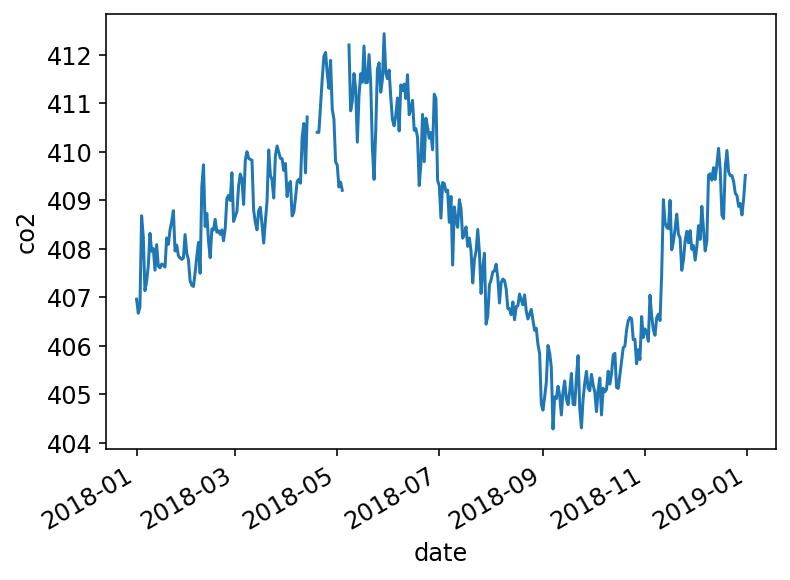

In [21]:
file_dir = '/geos/u73/msadiq/co2_data/extract/'
filename = '2018_daily_MLO.nc'
ds_obs = xr.open_dataset(file_dir + filename)
ds_obs['co2'].plot()

In [22]:
lon = ds_obs.attrs['site_longitude']
lat = ds_obs.attrs['site_latitude']
[lon,lat]

[-155.5763, 19.5362]

In [23]:
# model directory and file
mod_dir = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/CO2-2018/OutputDir/'
mod_file = 'SpeciesConc.2018.nc'
ds_mod = xr.open_dataset(mod_dir + mod_file)
dr = ds_mod['SpeciesConc_CO2']

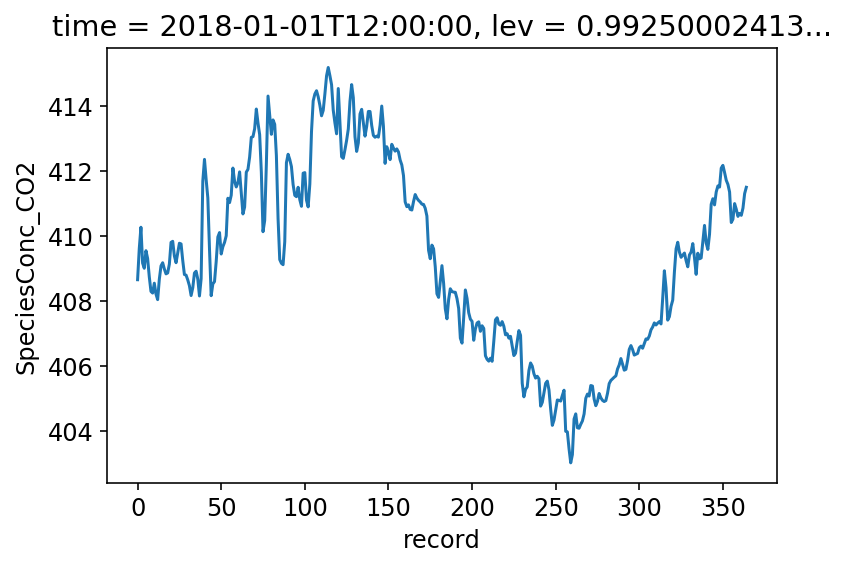

In [24]:
daily_co2_mod = dr[:,0,0,:,:]
ts_model = daily_co2_mod.sel(lon = lon, lat = lat, method='nearest')*1e6
ts_model.plot()

In [25]:
ds_obs['obs'] = ds_obs['co2']
ds_obs['mod'] = ds_obs['co2']
ds_obs['mod'].values = ts_model.values

obs_series = ds_obs['obs'].values
model_series = ds_obs['mod'].values
R = ma.corrcoef(ma.masked_invalid(obs_series), ma.masked_invalid(model_series))

format_R = float("{0:.2f}".format(R[0,1]))
format_R

0.89

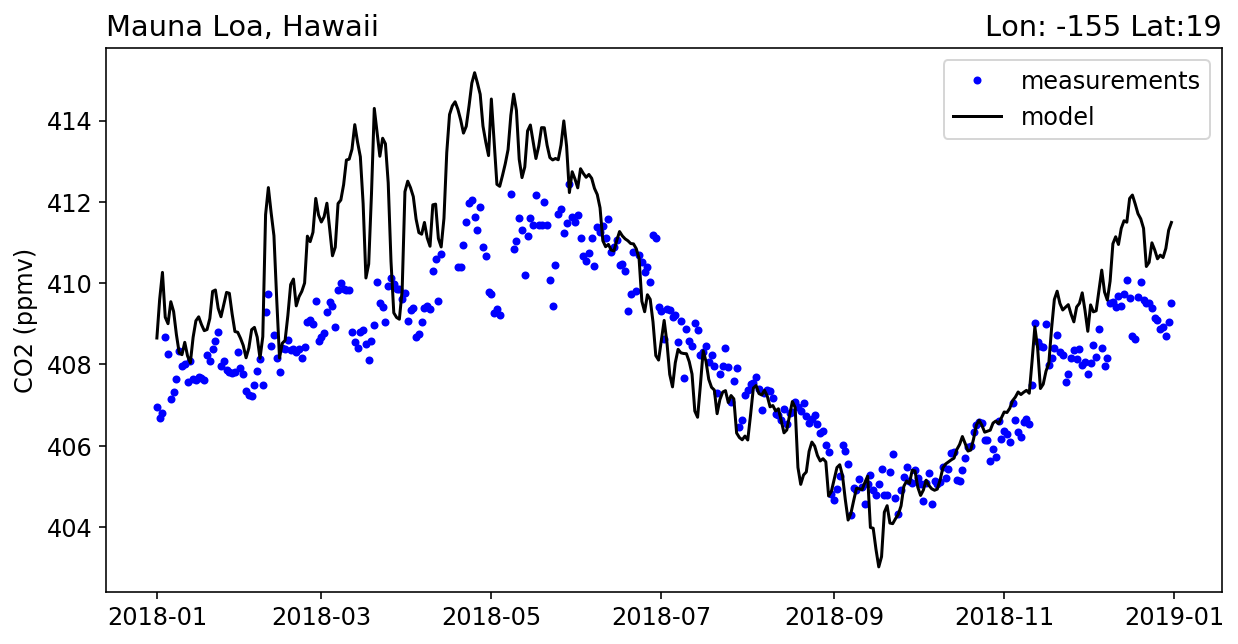

In [28]:
fig = plt.figure(figsize=[10,5])
plt.plot(ds_obs.date, ds_obs['obs'], 'b.', label = 'measurements')
plt.plot(ds_obs.date, ds_obs['mod'], 'black', label = 'model')
plt.legend()
plt.title(ds_obs.attrs['site_name'], loc='left') 
plt.title('Lon: ' + str(int(lon)) + ' Lat:' + str(int(lat)), loc='right')
plt.ylabel('CO2 (ppmv)')

fig.savefig(file_dir + '/plots/' + str(year) + '_' + ds_obs.attrs['site_code'] + '_mod_vs_obs.png', dpi=300)

In [29]:
# do the above calculations for all of sites

In [30]:
file_dir = '/geos/u73/msadiq/co2_data/extract/'
file1 = open(file_dir + 'filenames', 'r')
lines = file1.readlines()

-0.1
0.97
0.71
0.86
0.18
0.95
0.59
0.95
0.86
0.79
0.79
0.89
0.34
0.42
0.54
0.88
0.72
0.8
0.86
0.39
0.51
0.85
-0.26
0.93
0.0
0.69
0.59
0.72
0.93
0.87
0.68
0.67
0.72
0.87
0.56
0.72
0.87
0.49
0.64
0.61
0.9
0.64
0.33
0.89
0.96
0.9
0.83
0.72
0.7
0.93
0.16
0.56
0.71
0.86
0.4
0.69
0.88
0.67
0.99
-0.37
0.7
0.93
0.98
0.81
0.57
0.84
0.91
0.57
0.84
0.97


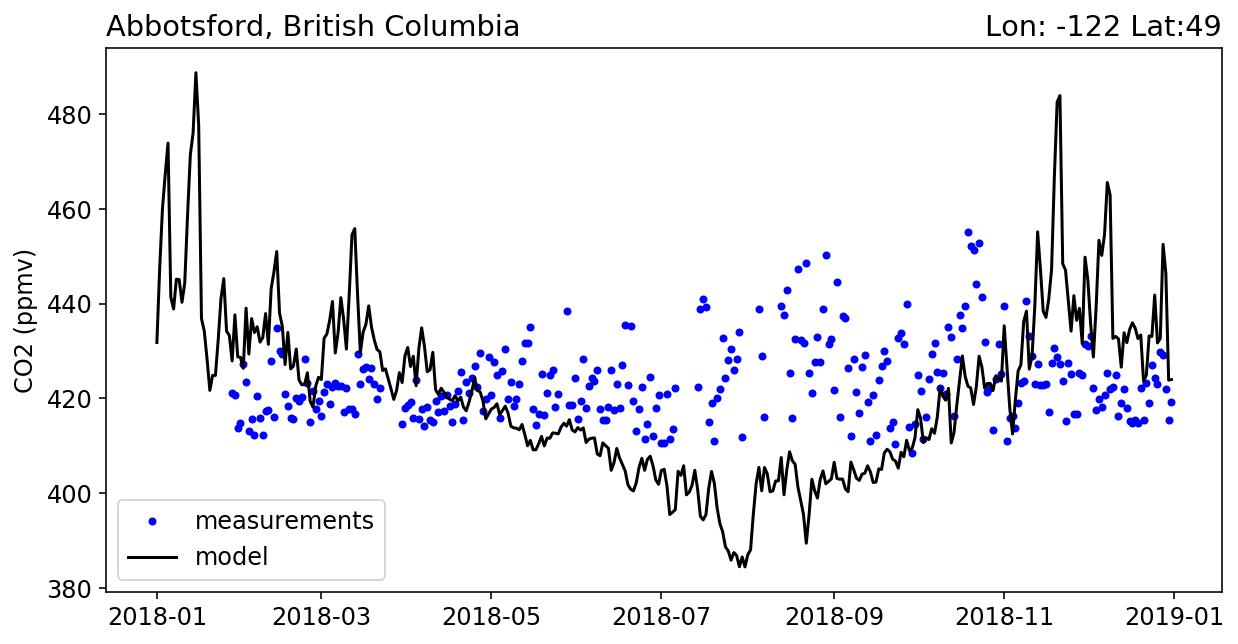

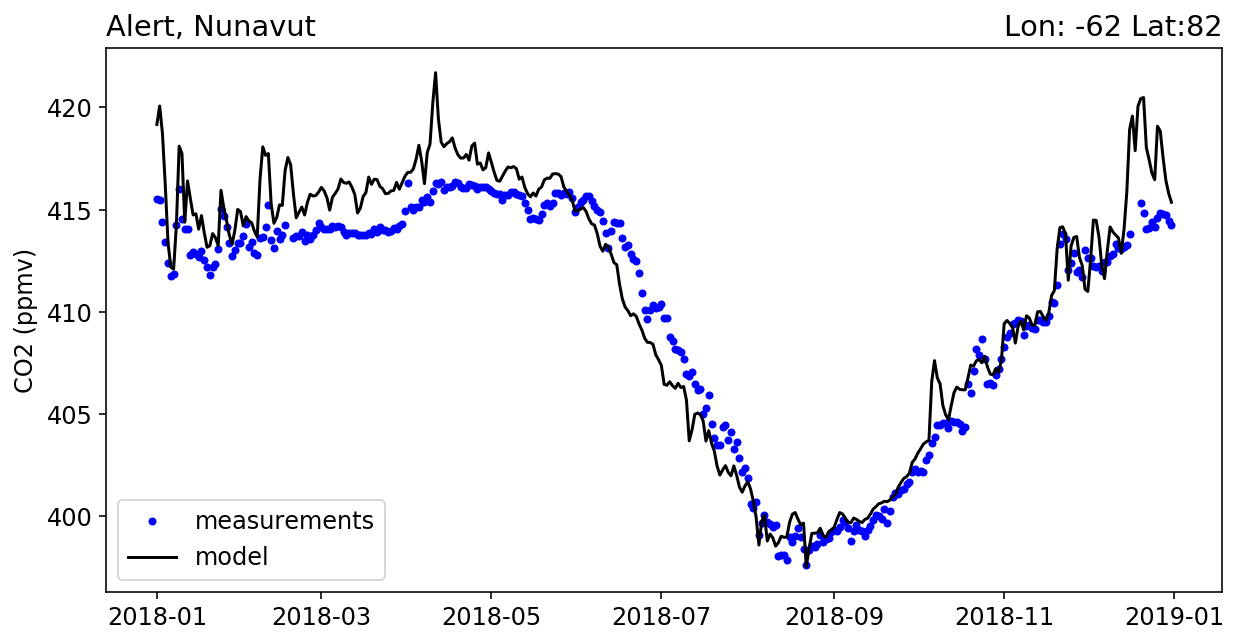

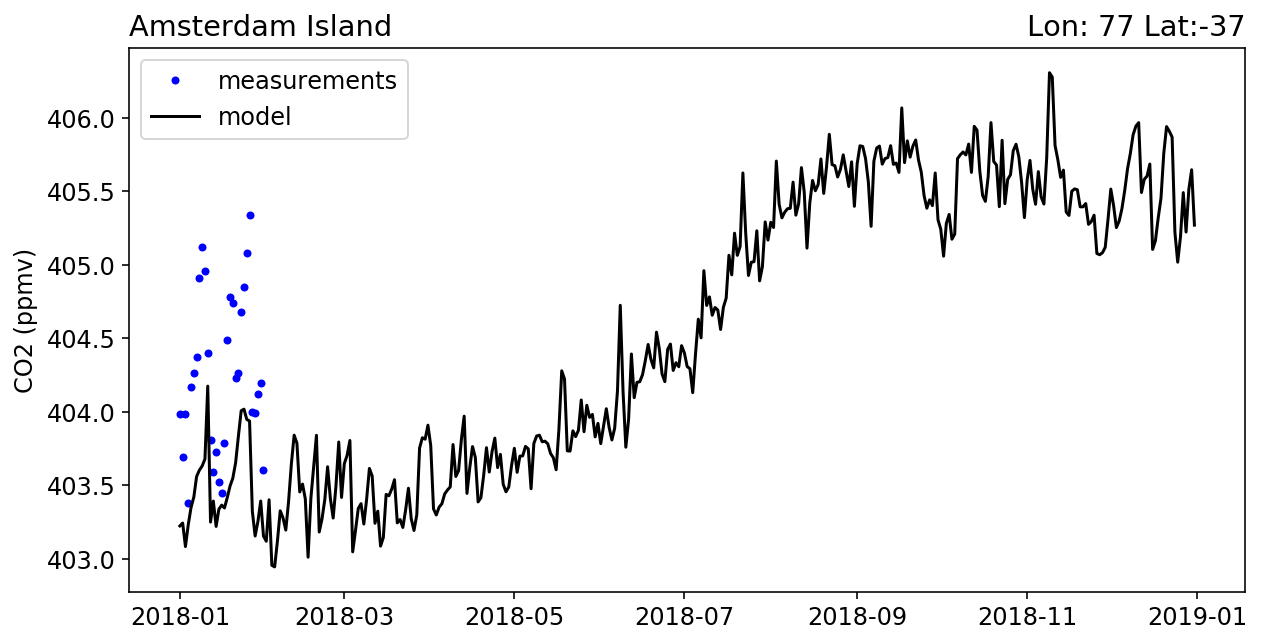

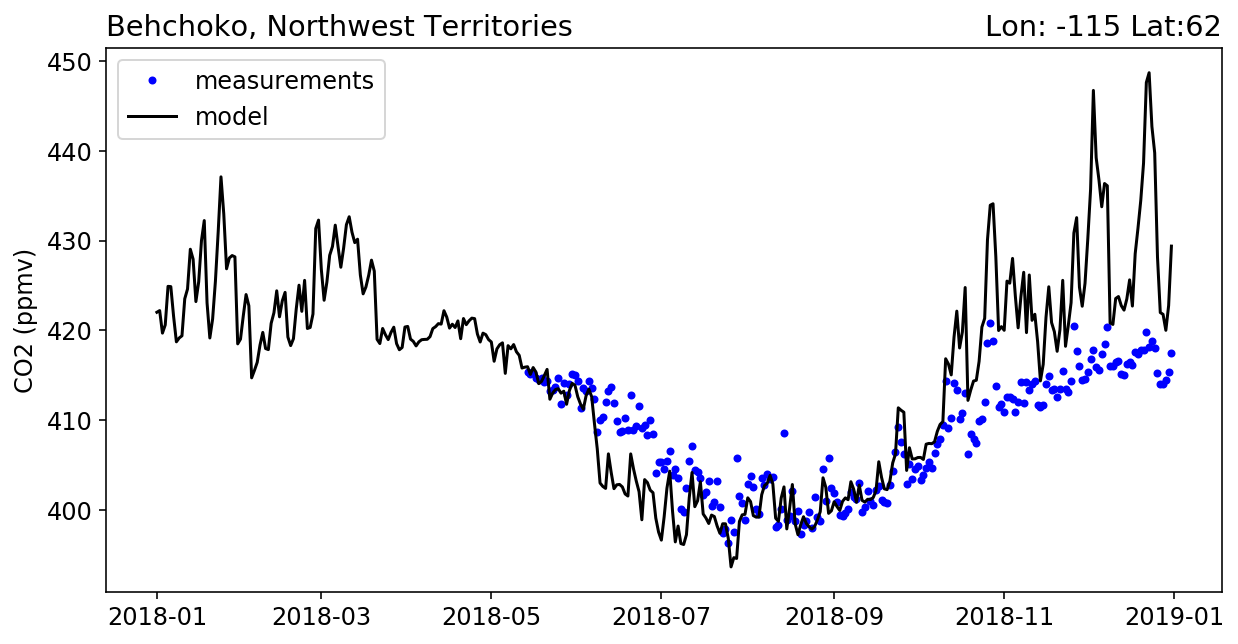

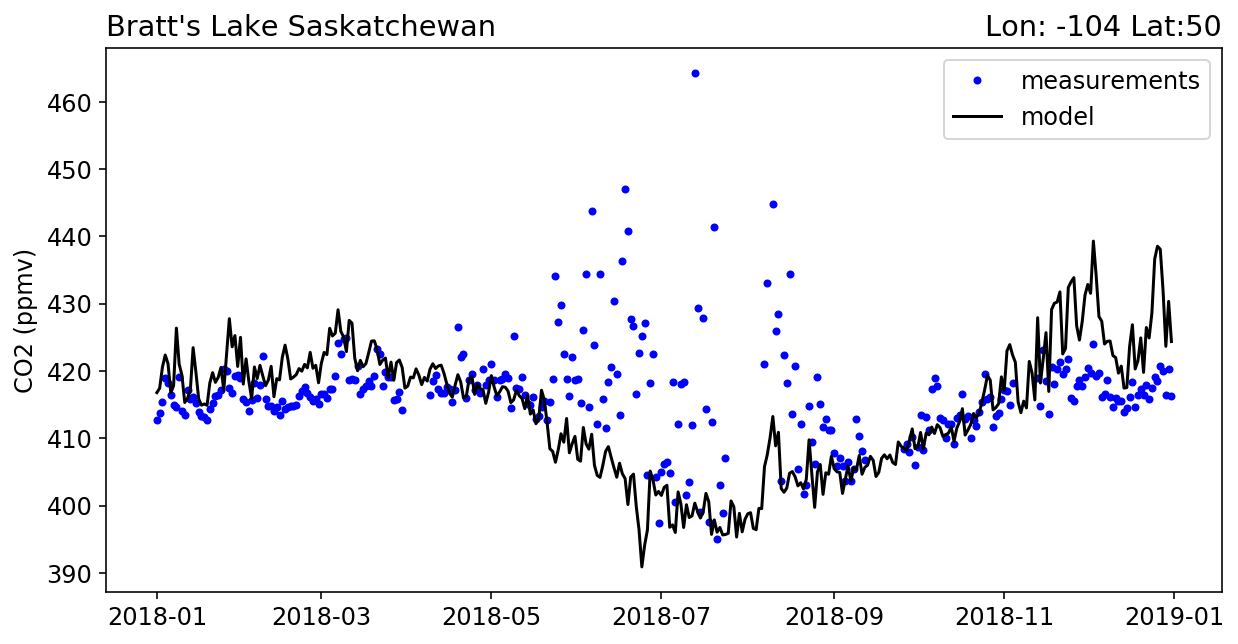

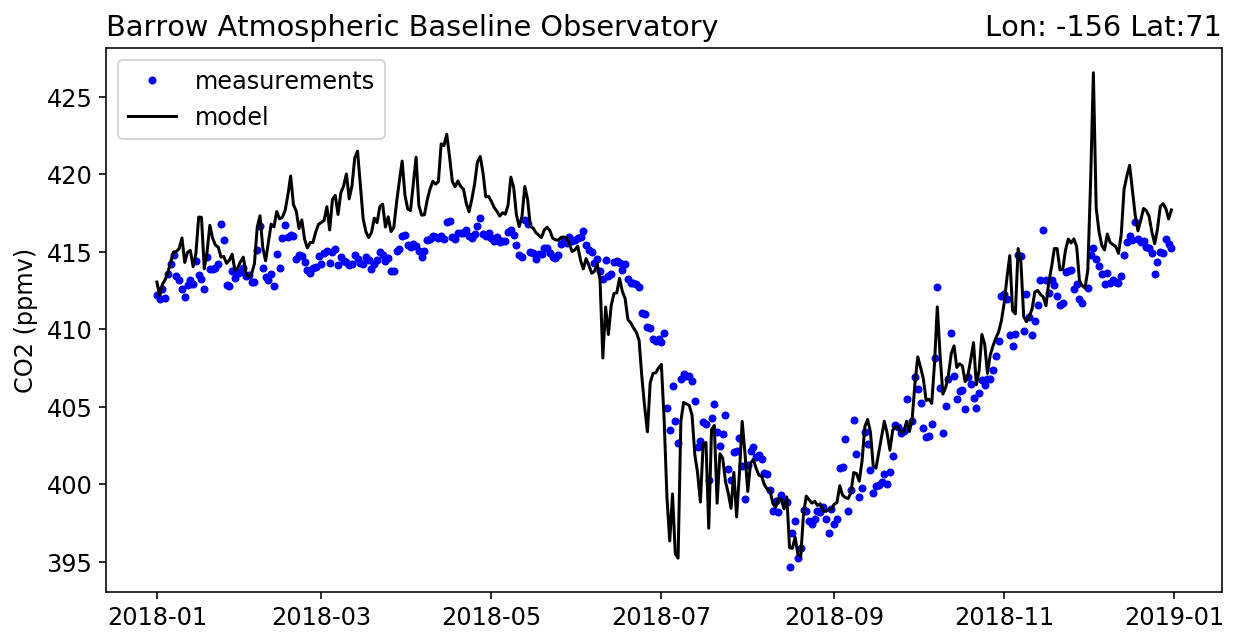

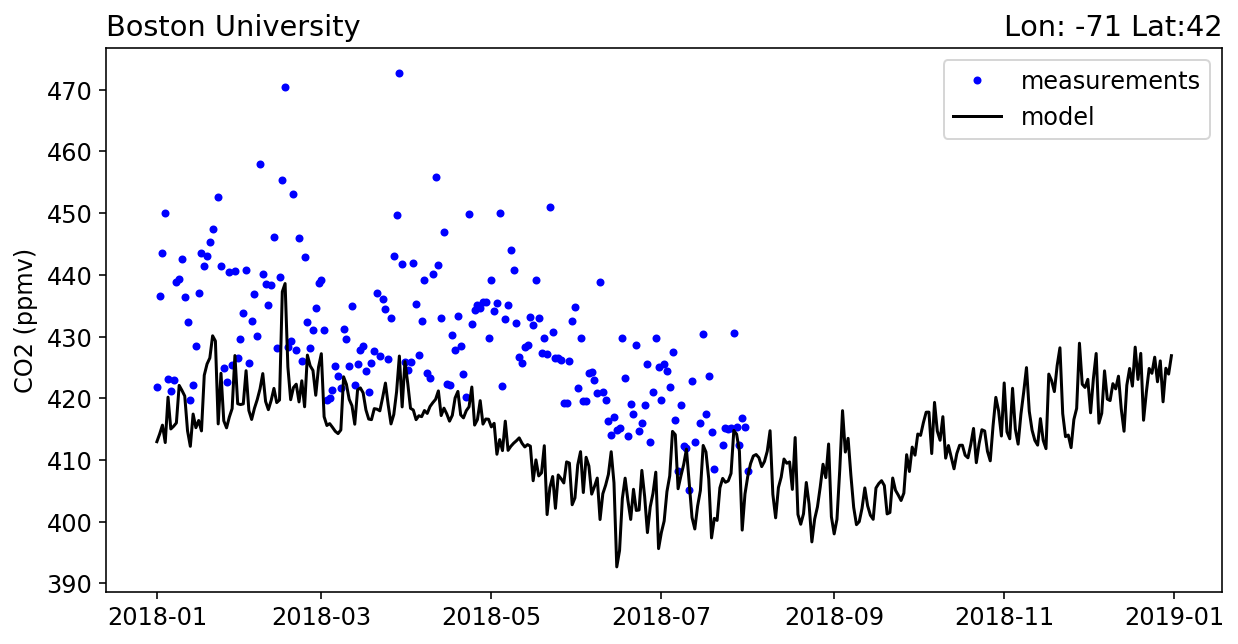

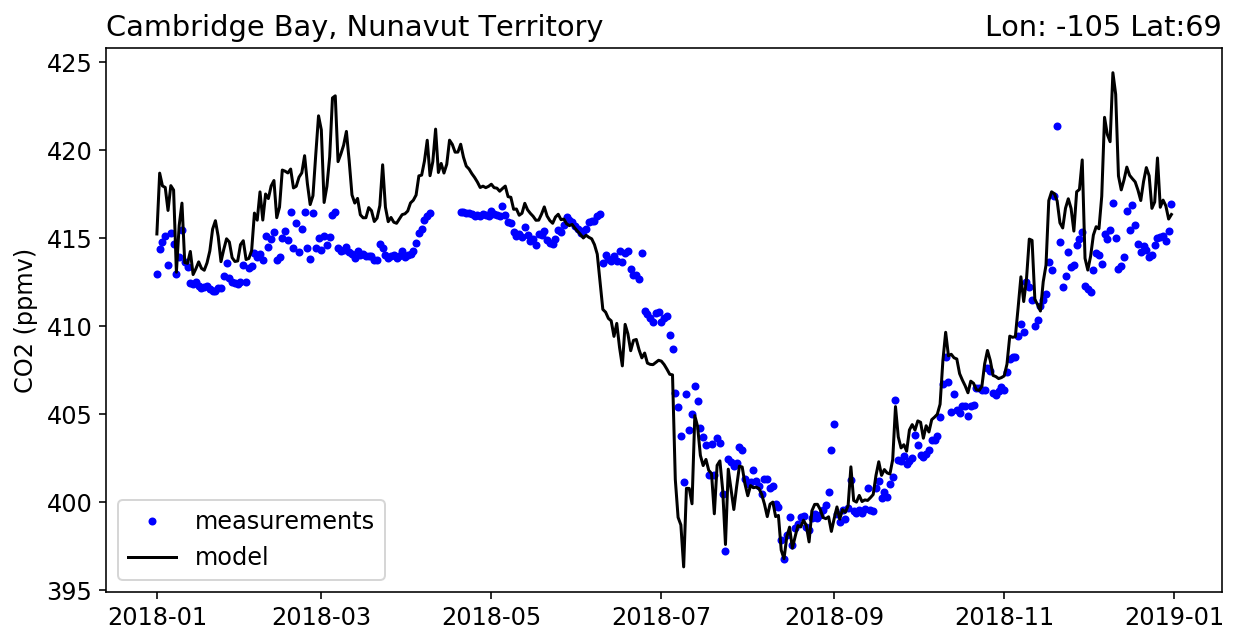

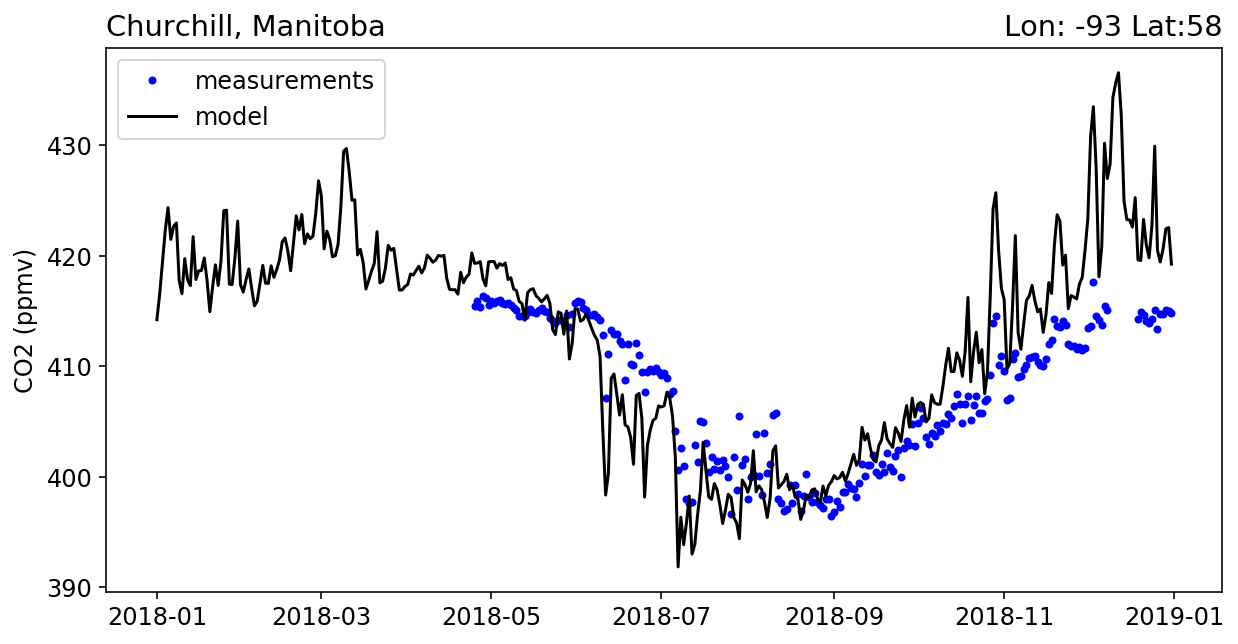

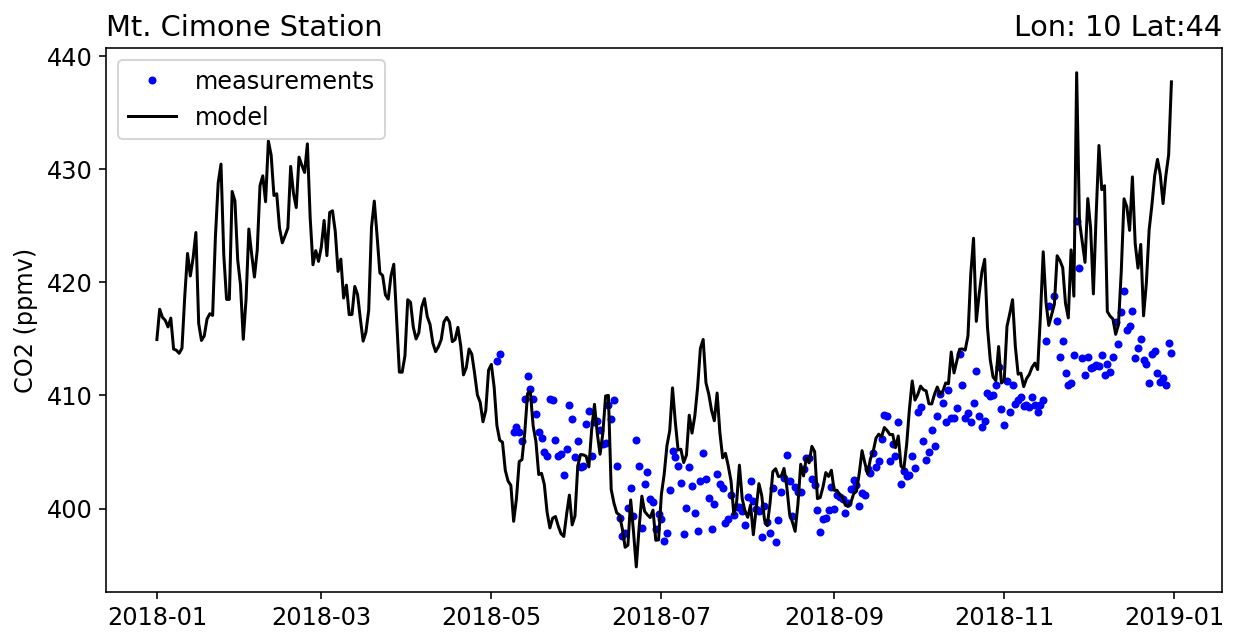

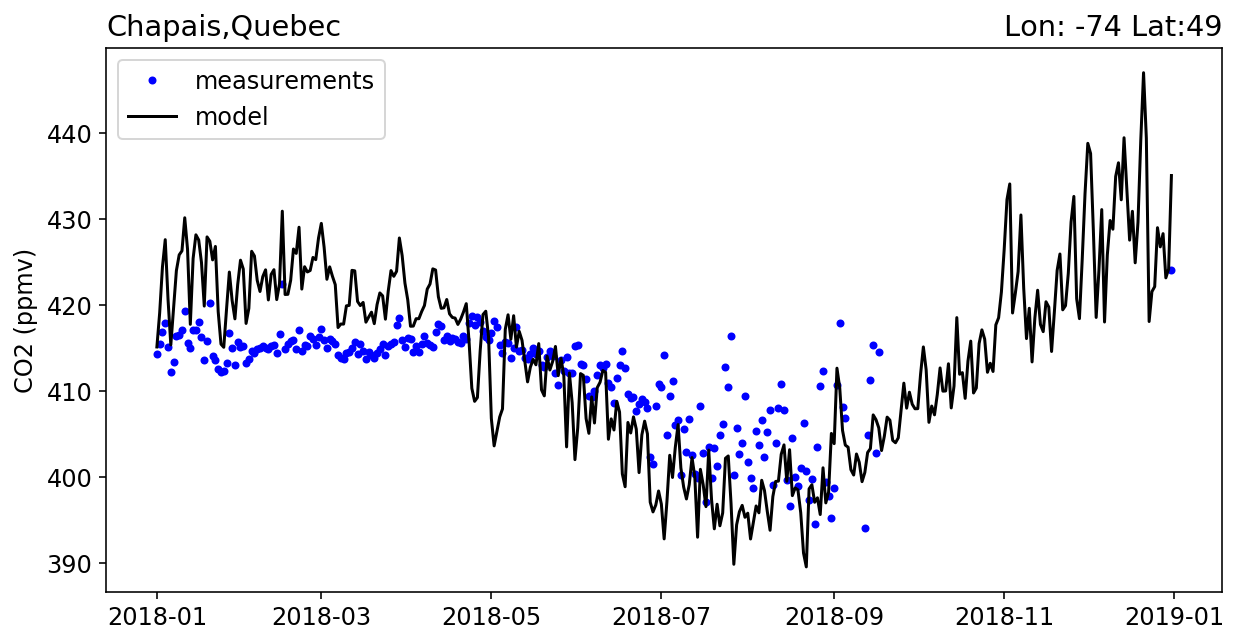

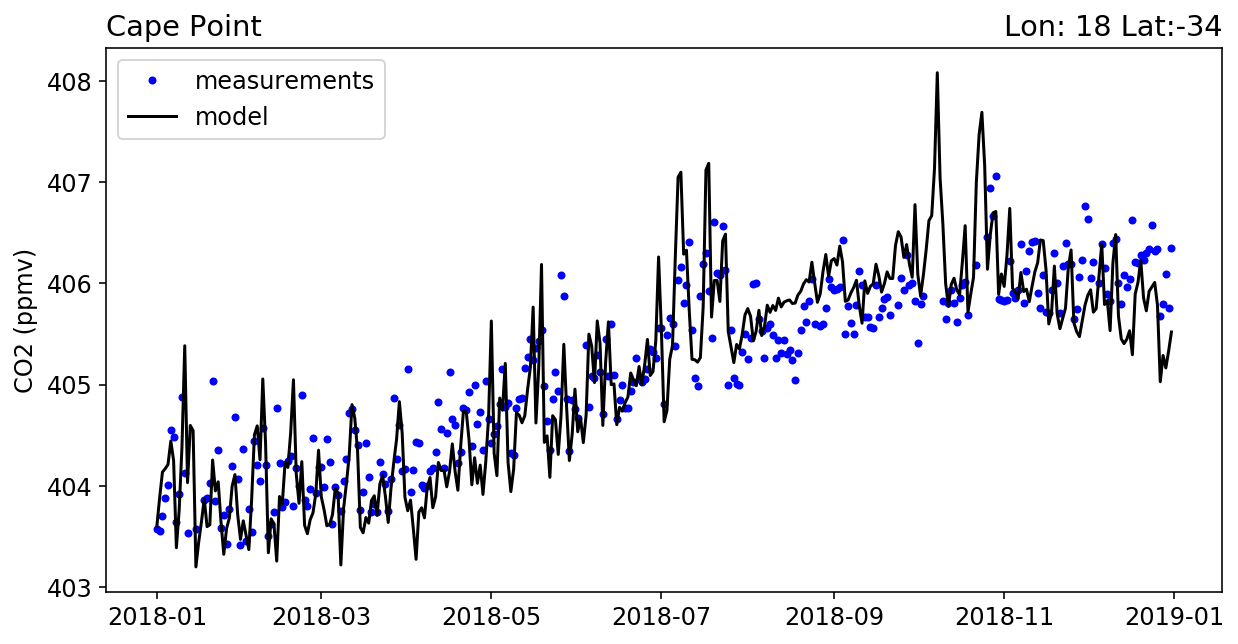

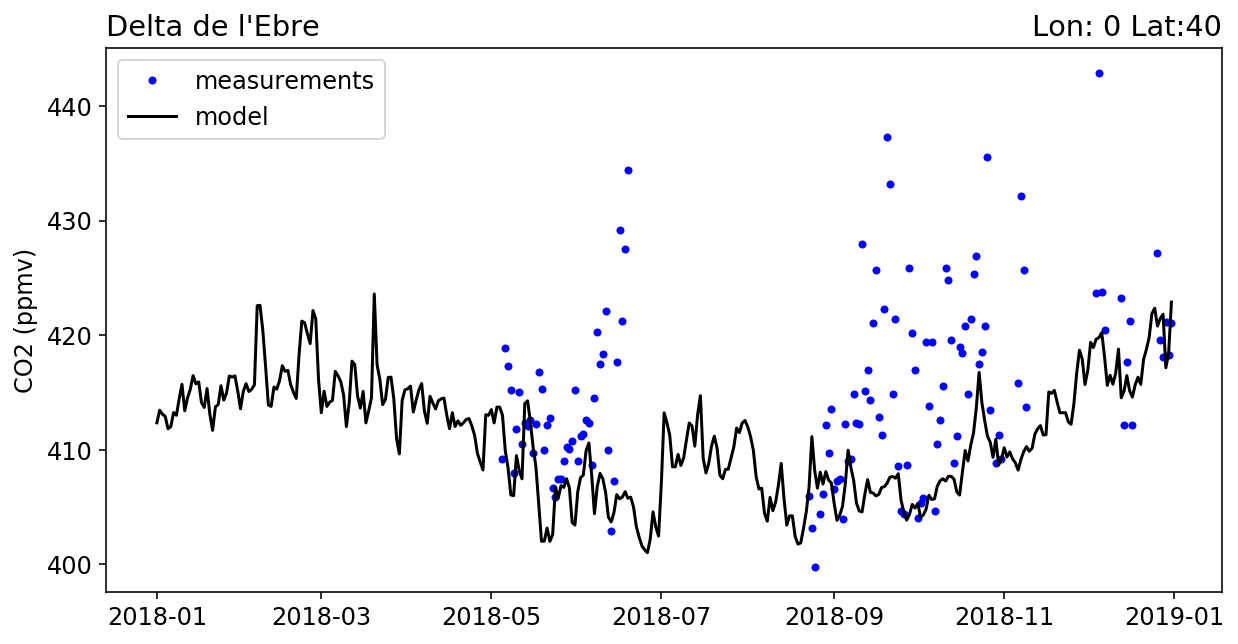

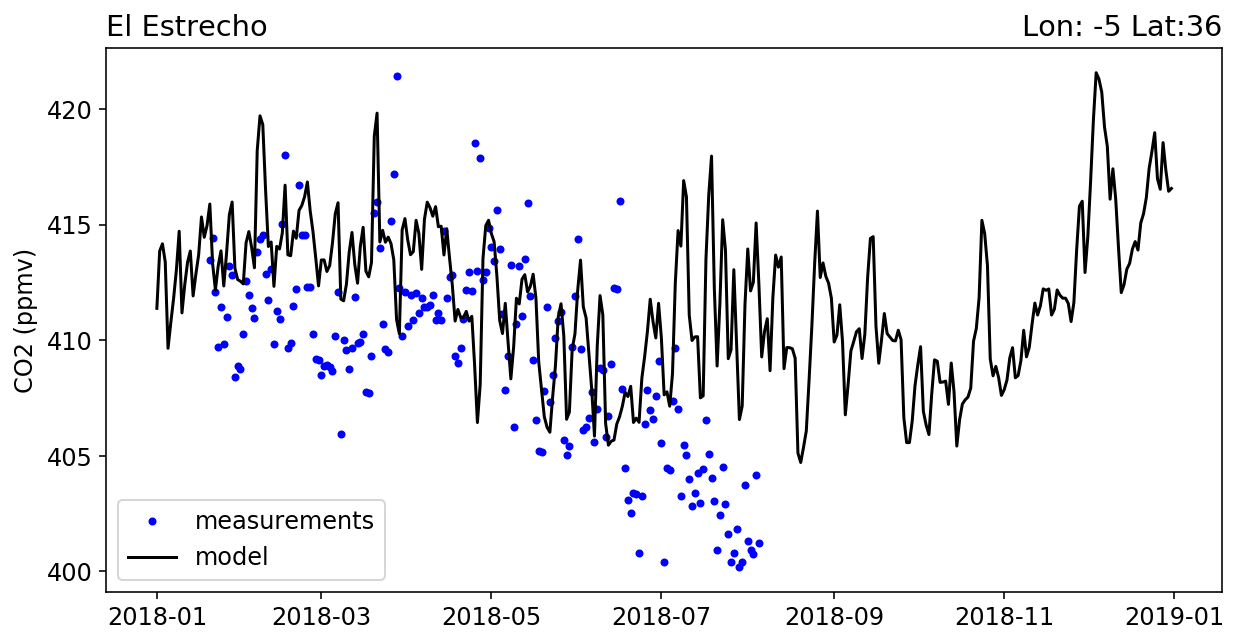

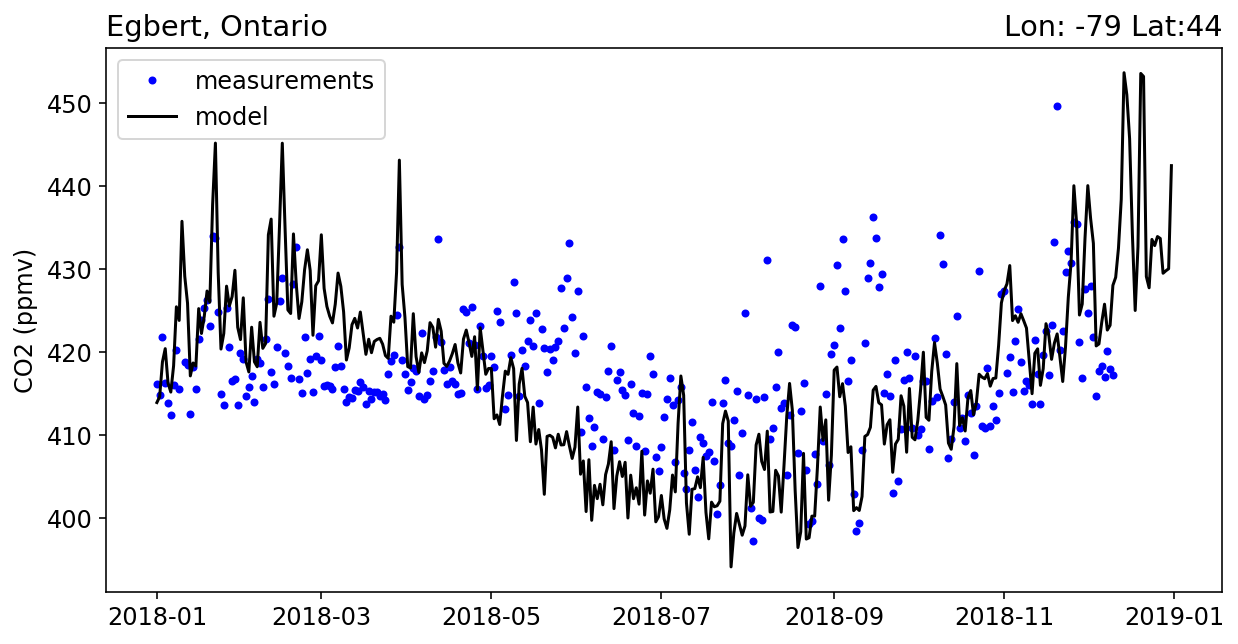

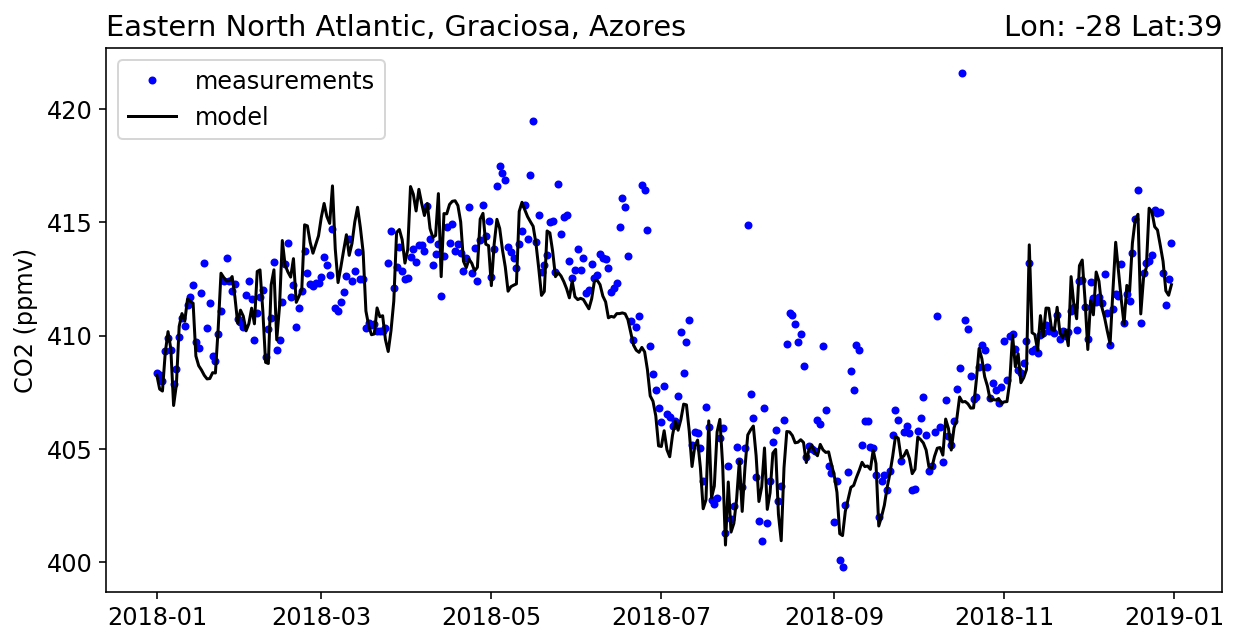

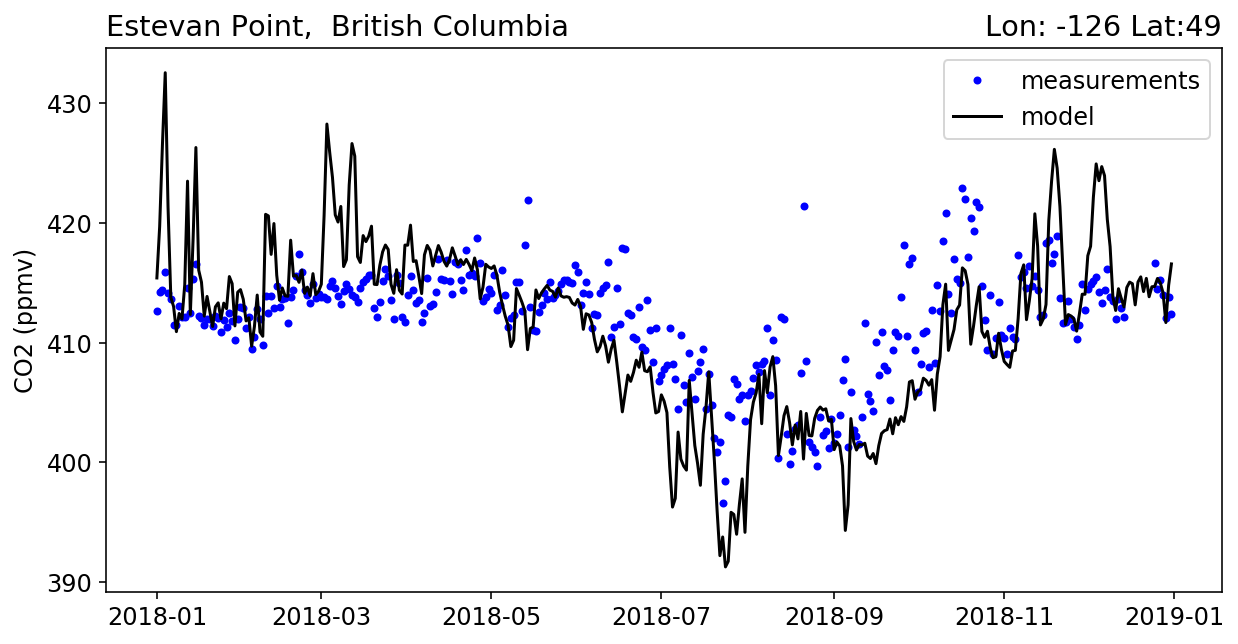

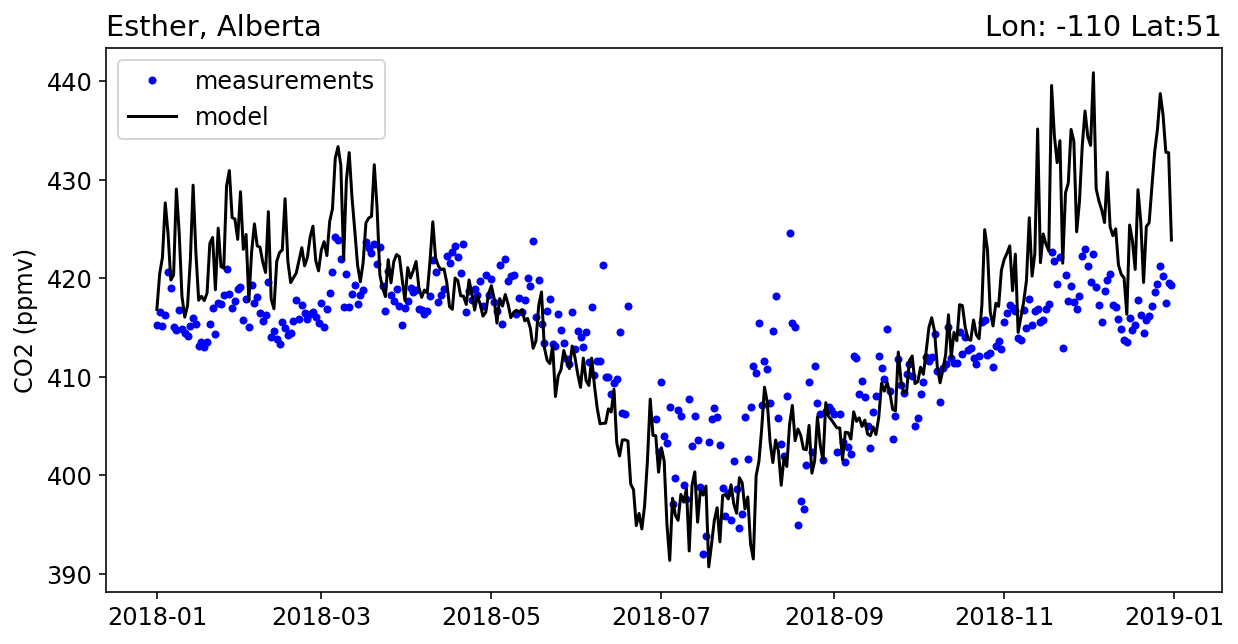

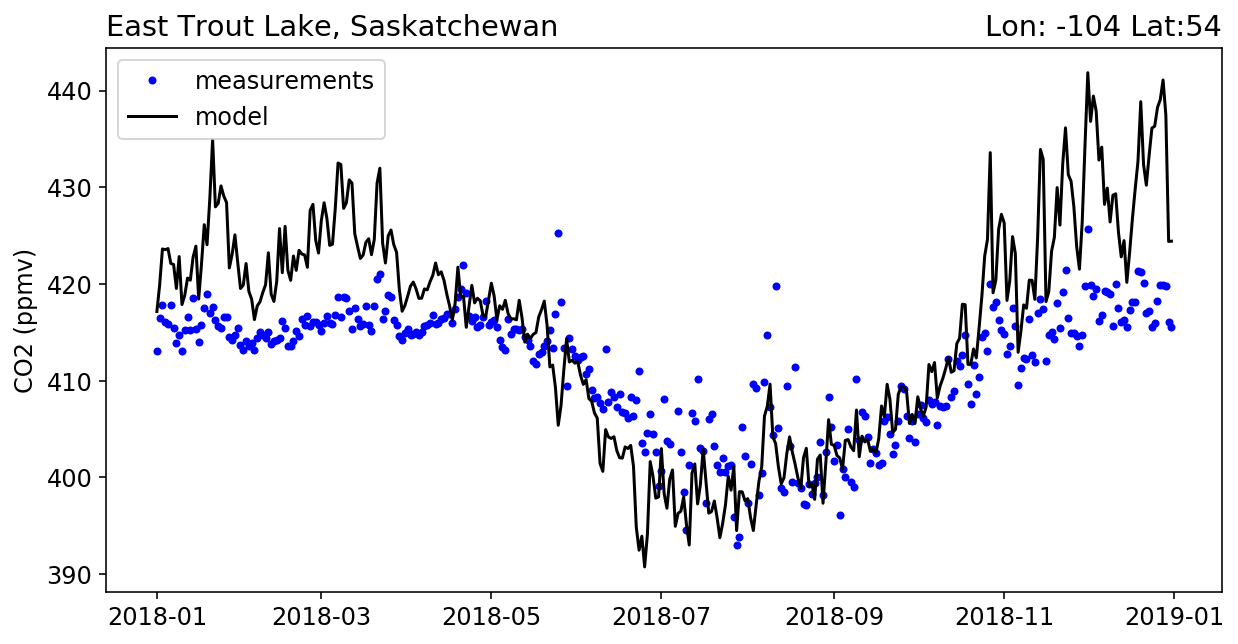

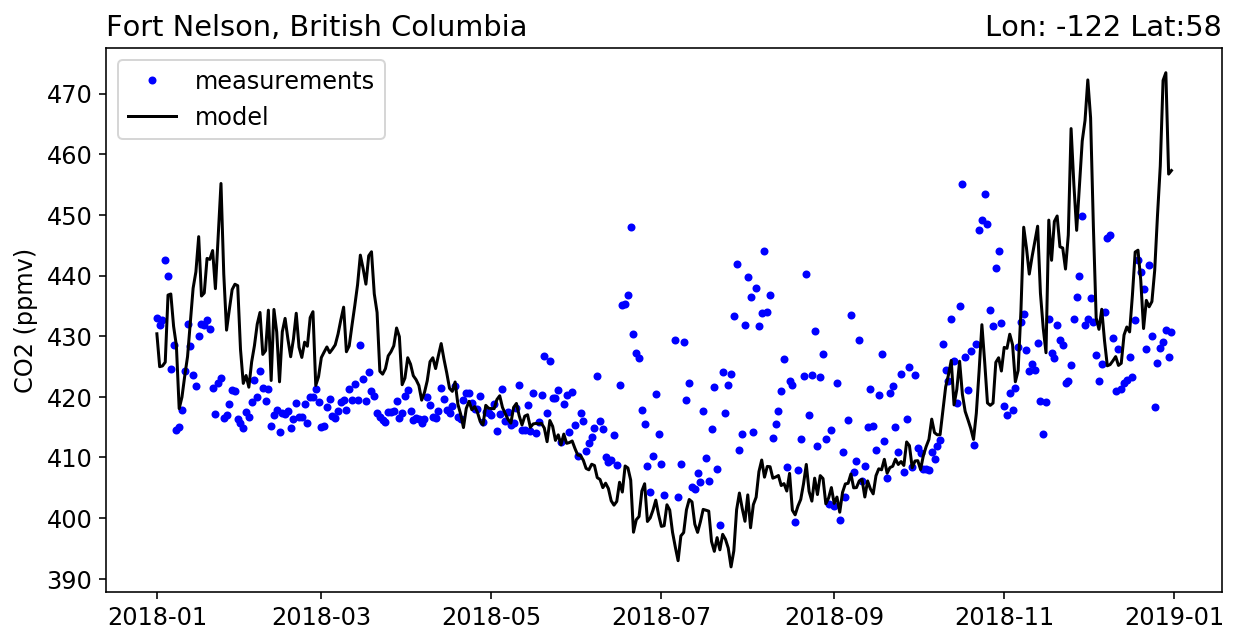

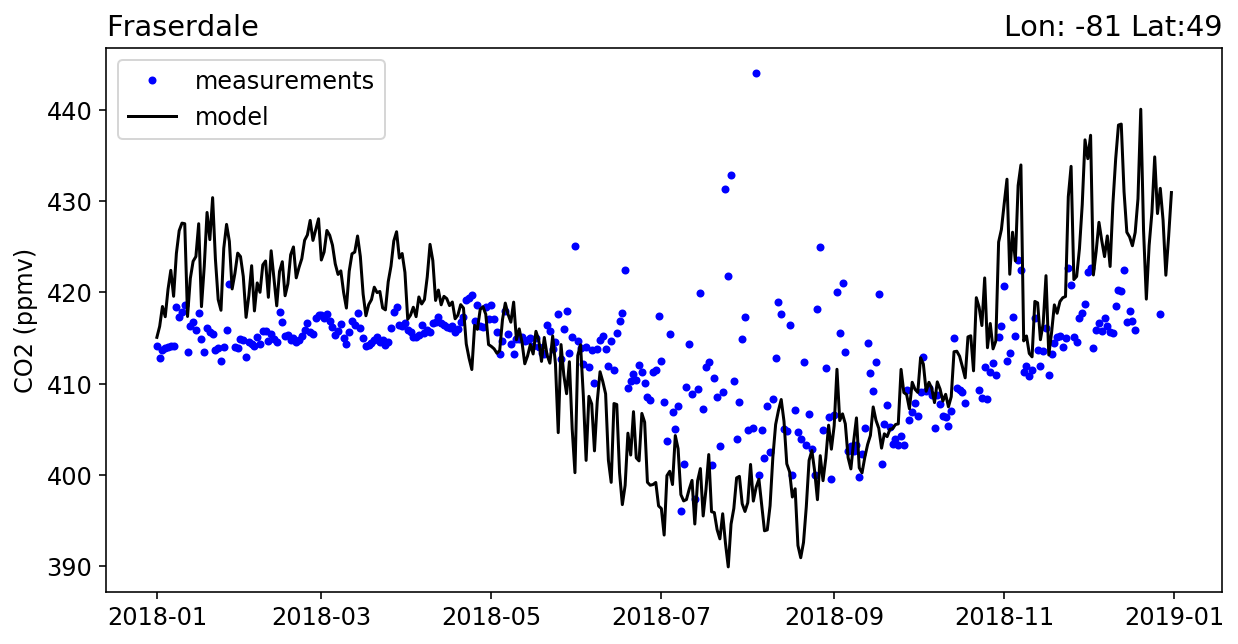

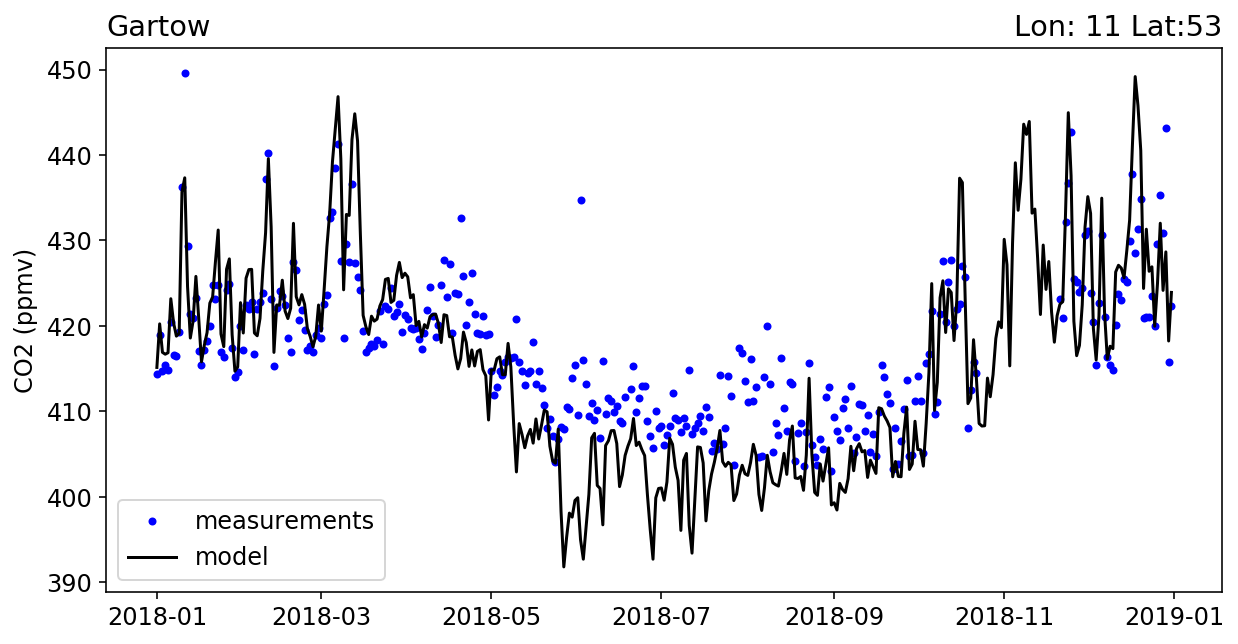

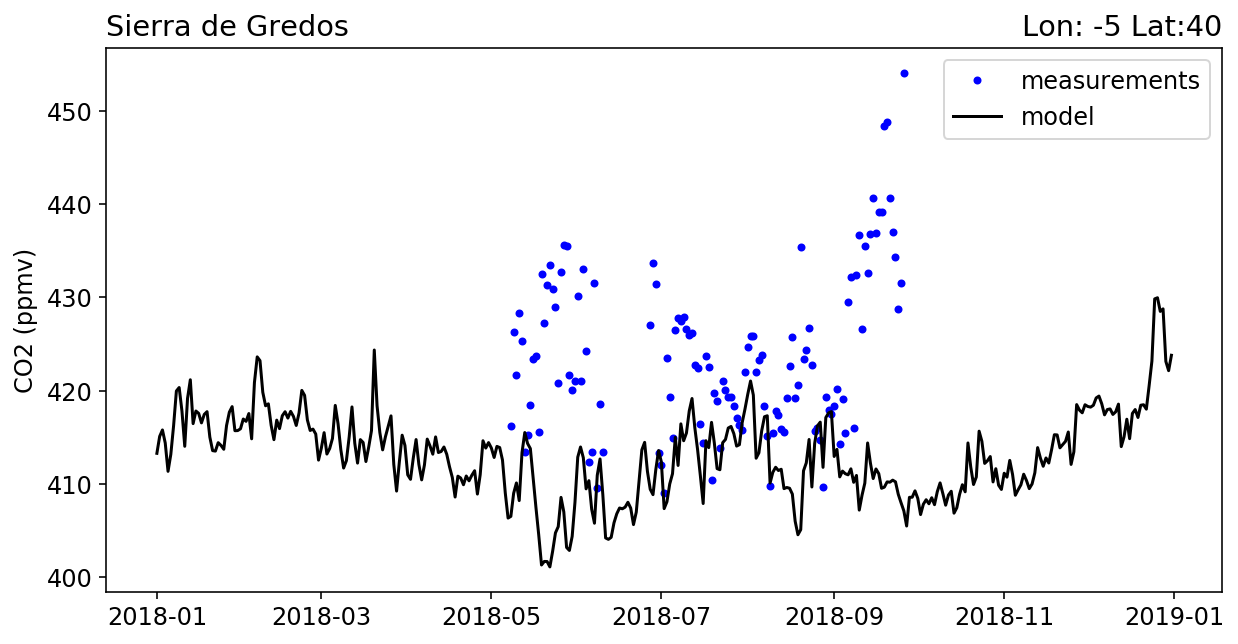

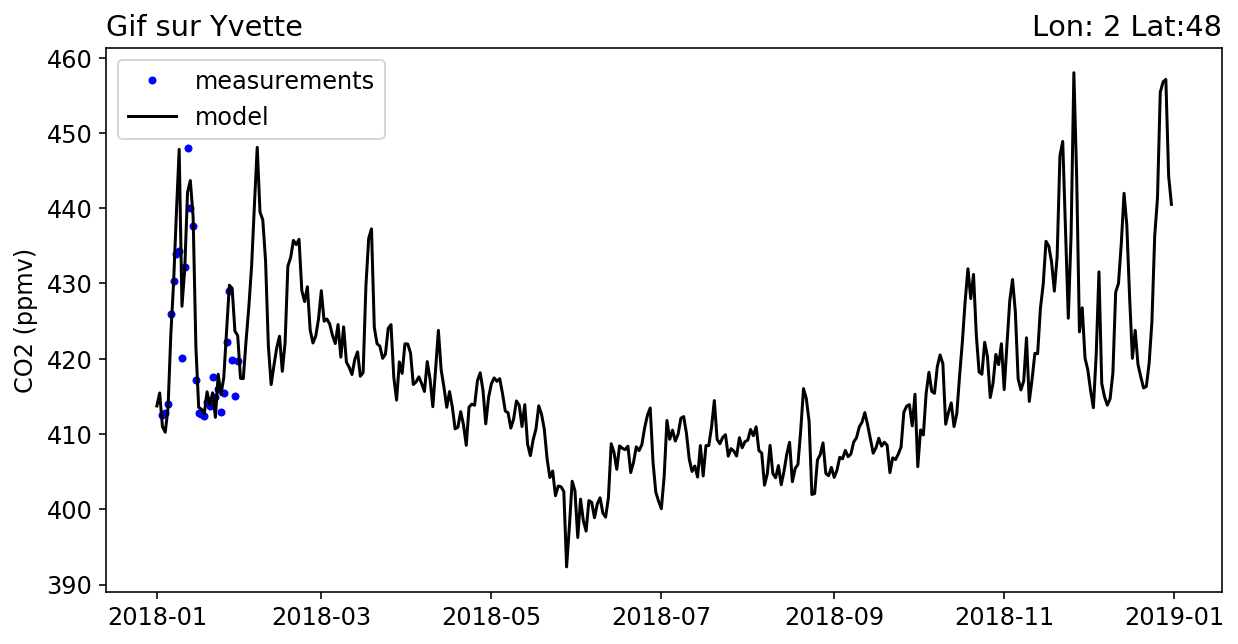

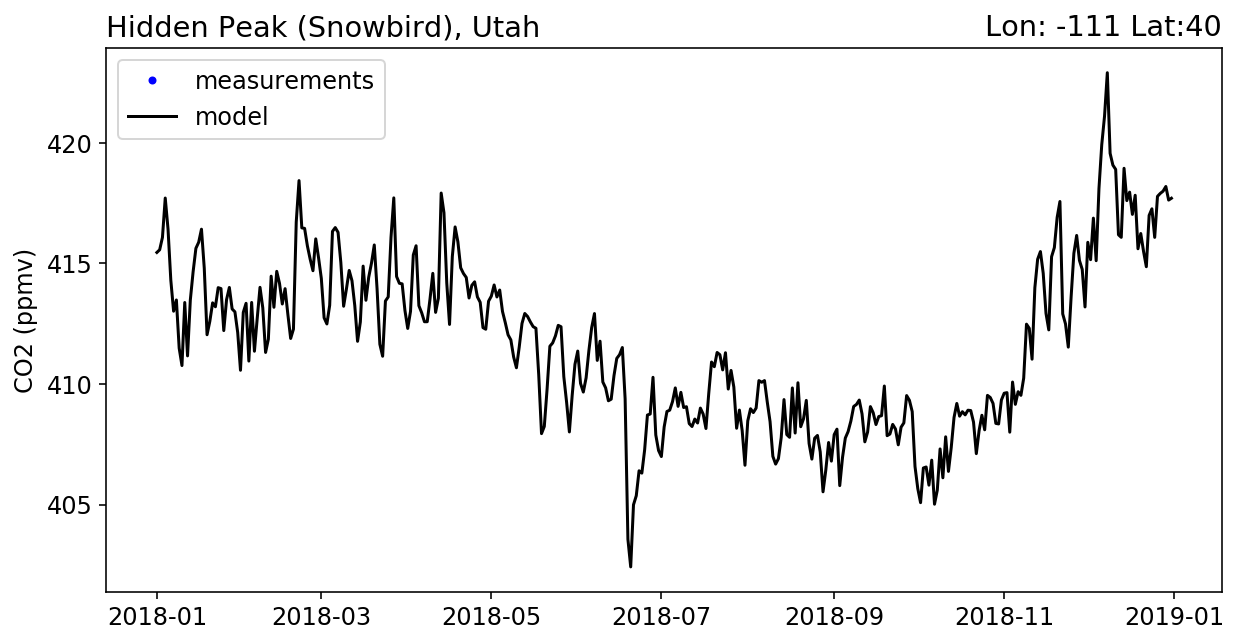

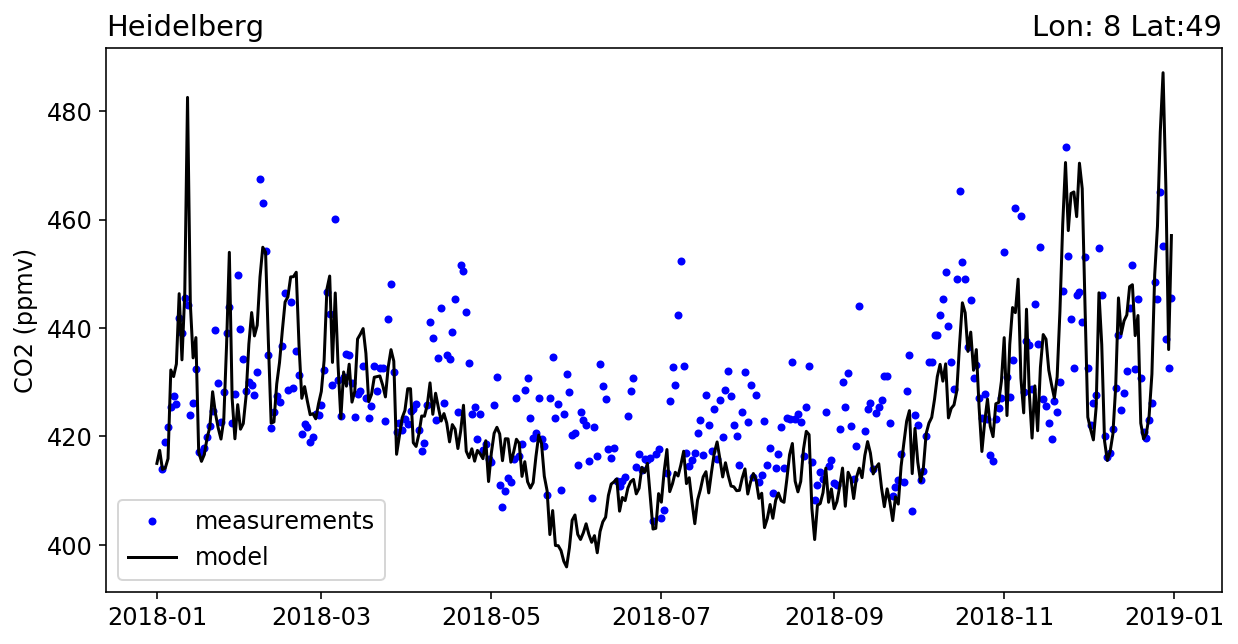

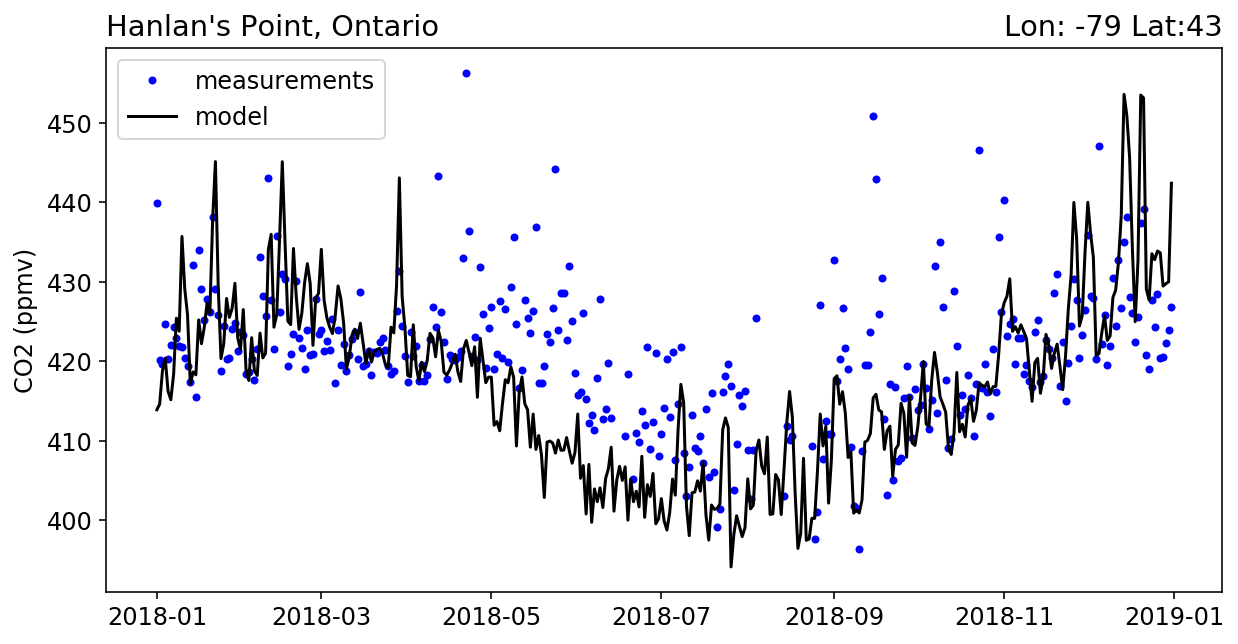

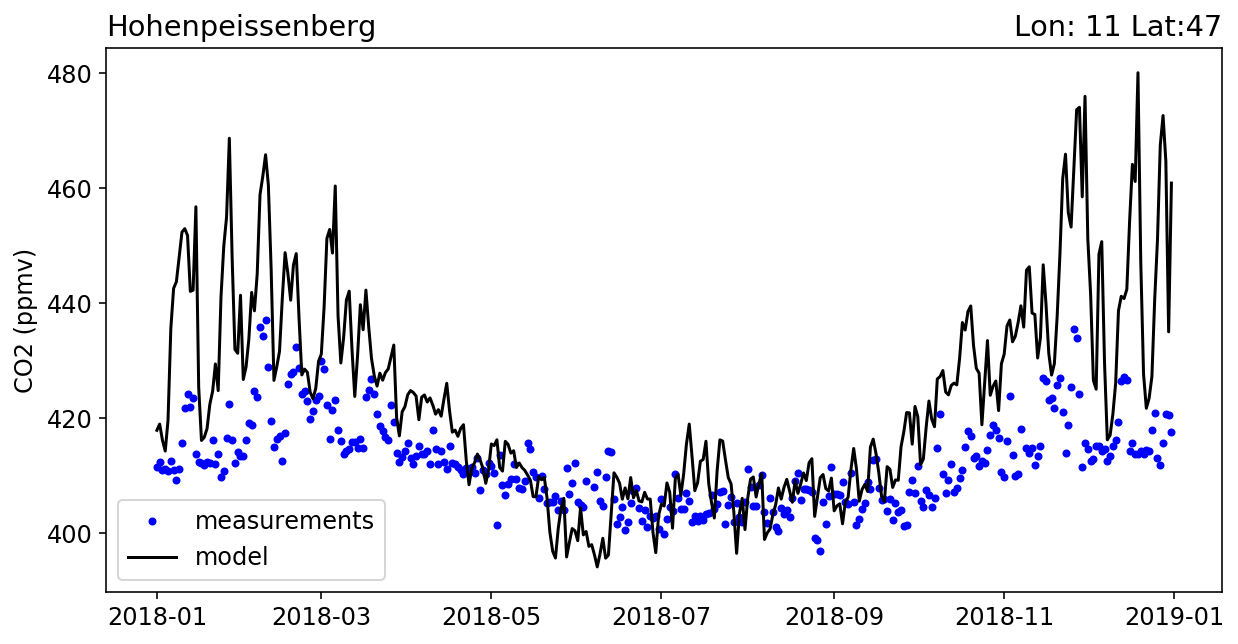

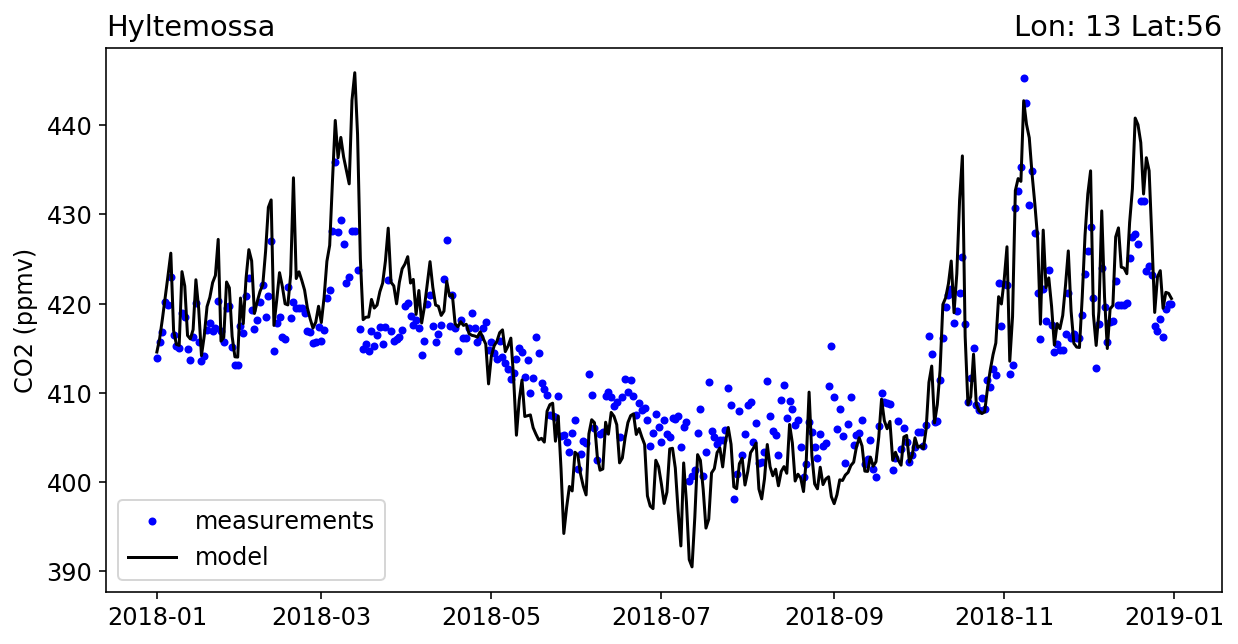

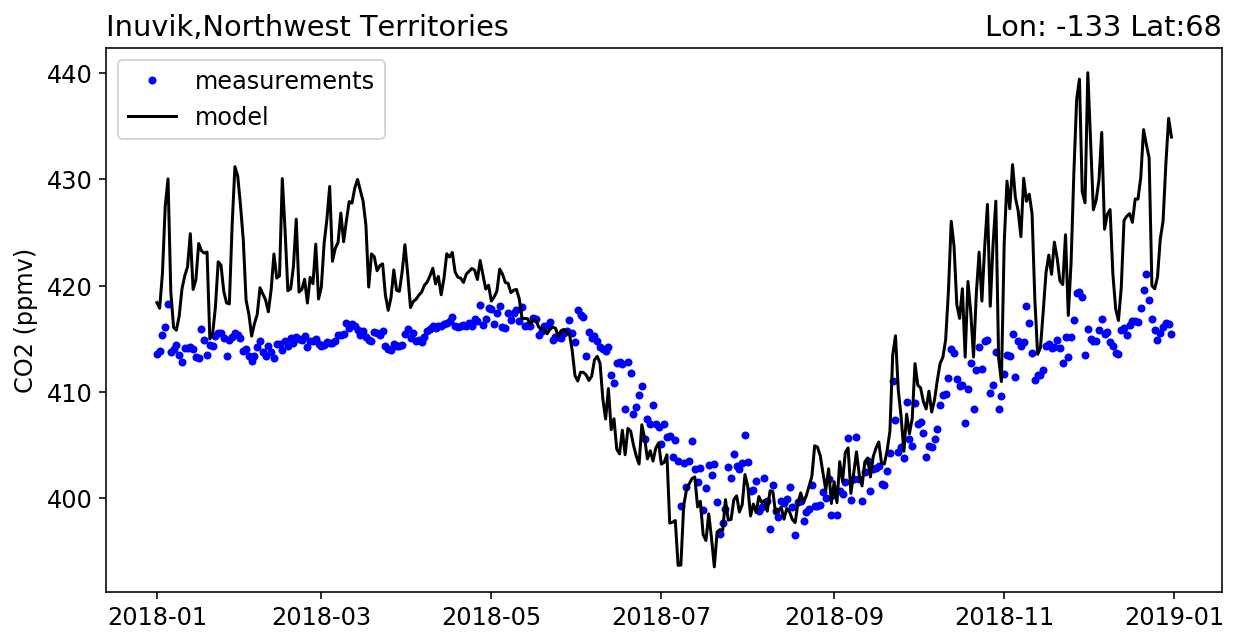

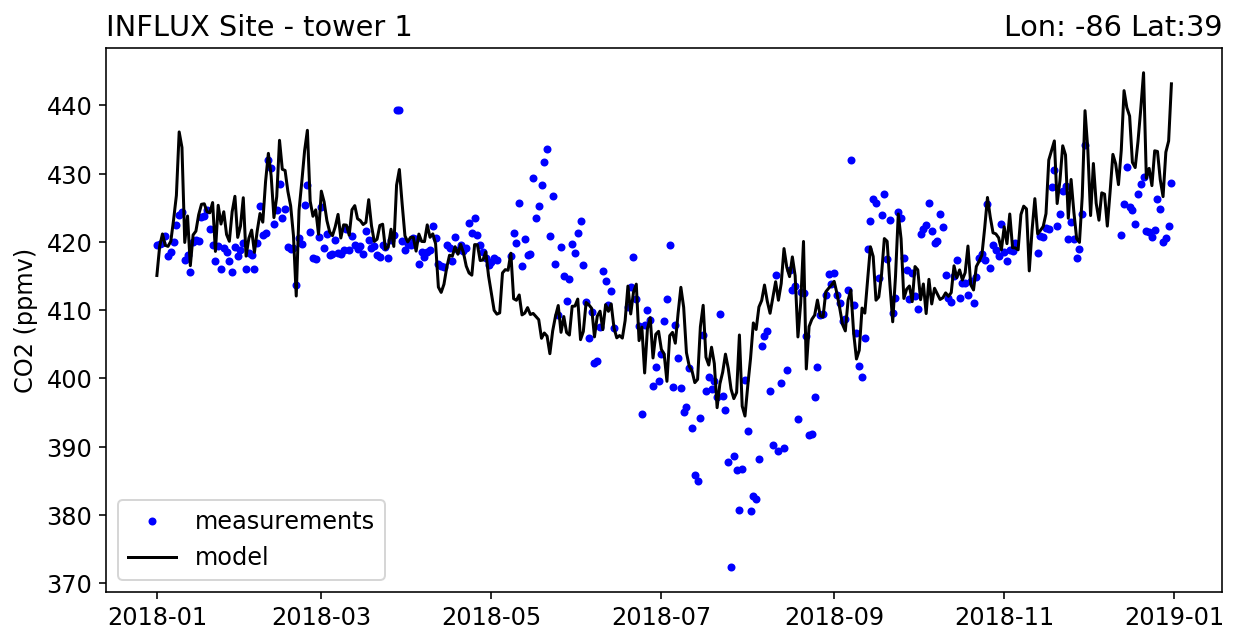

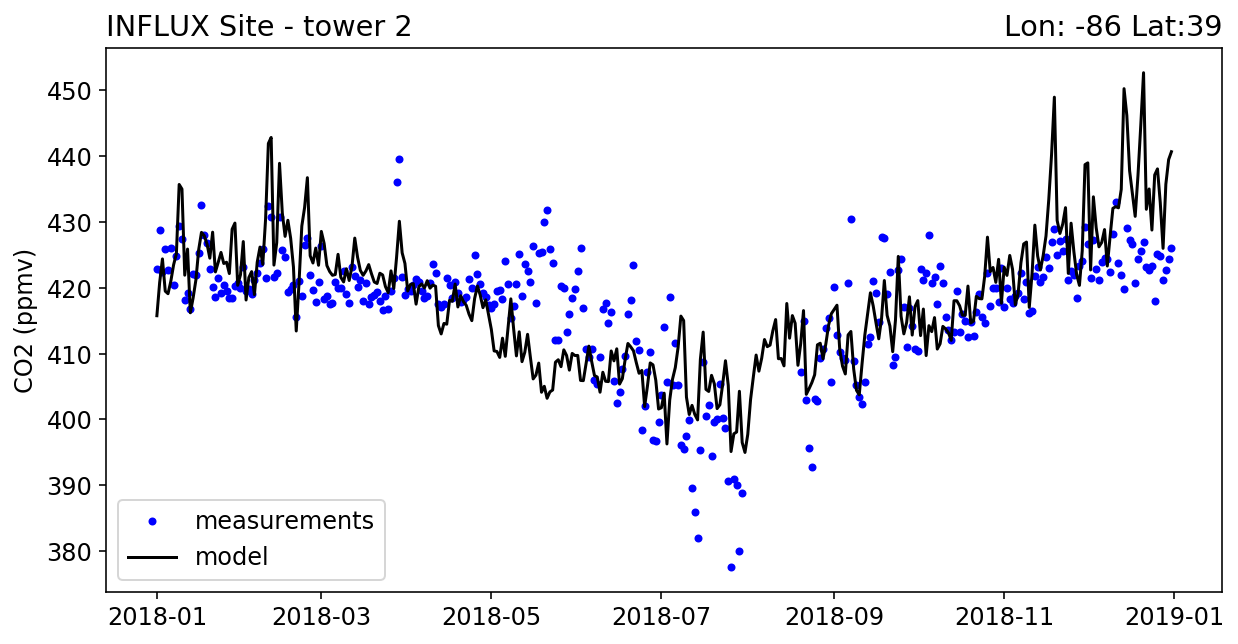

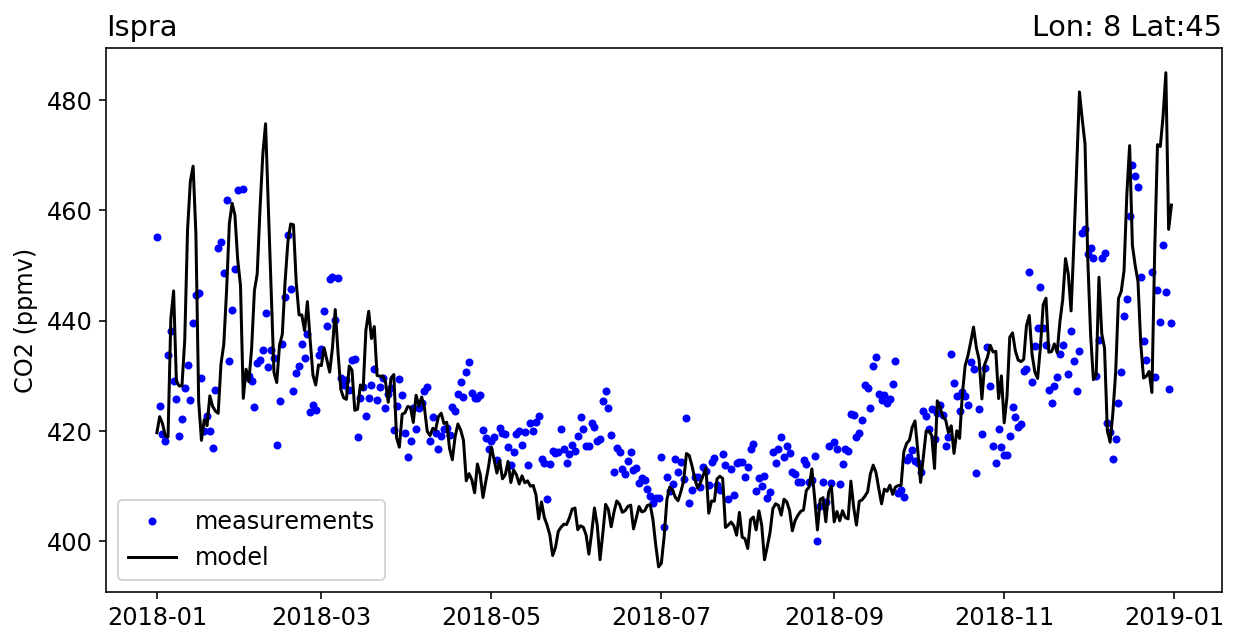

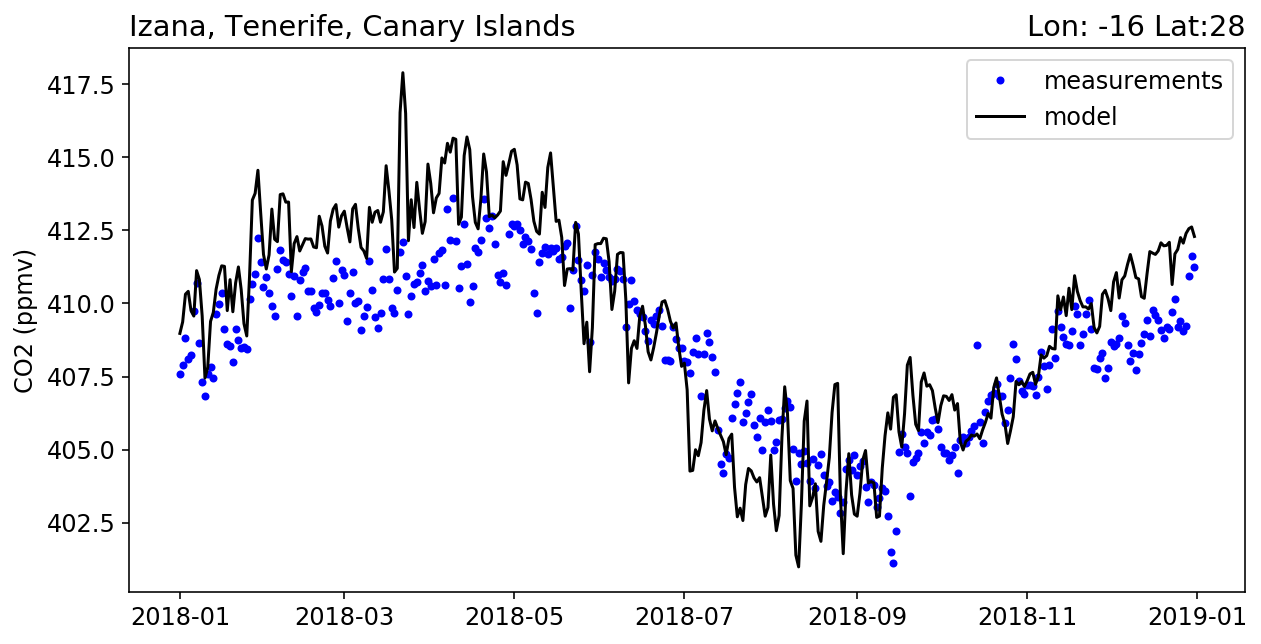

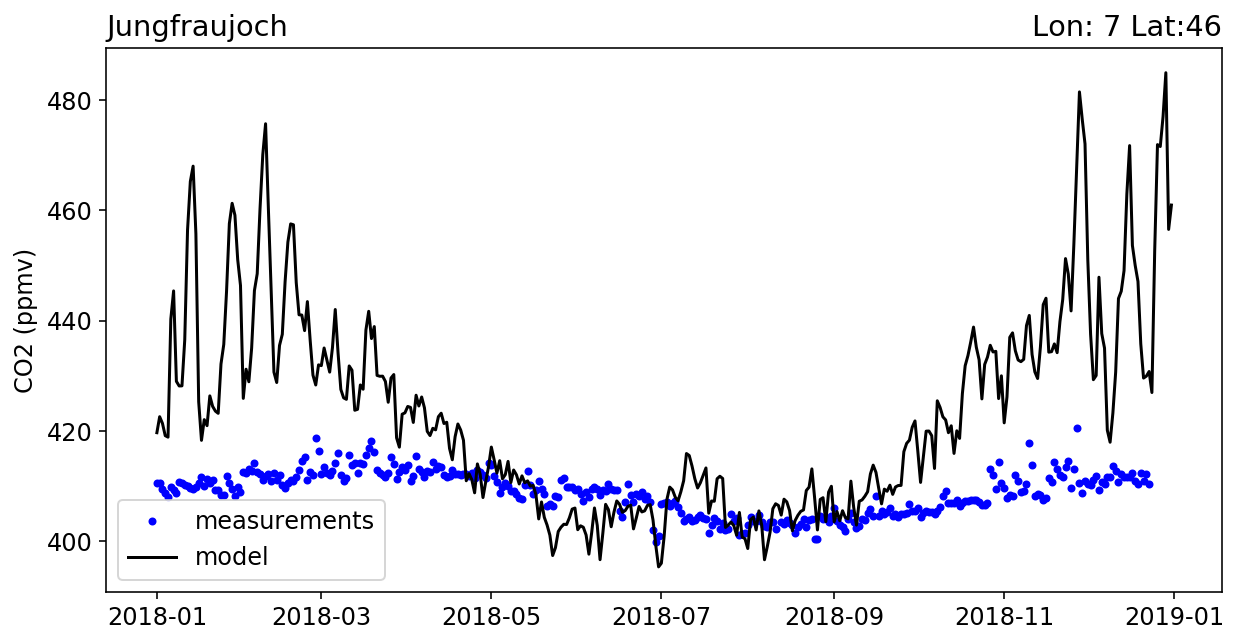

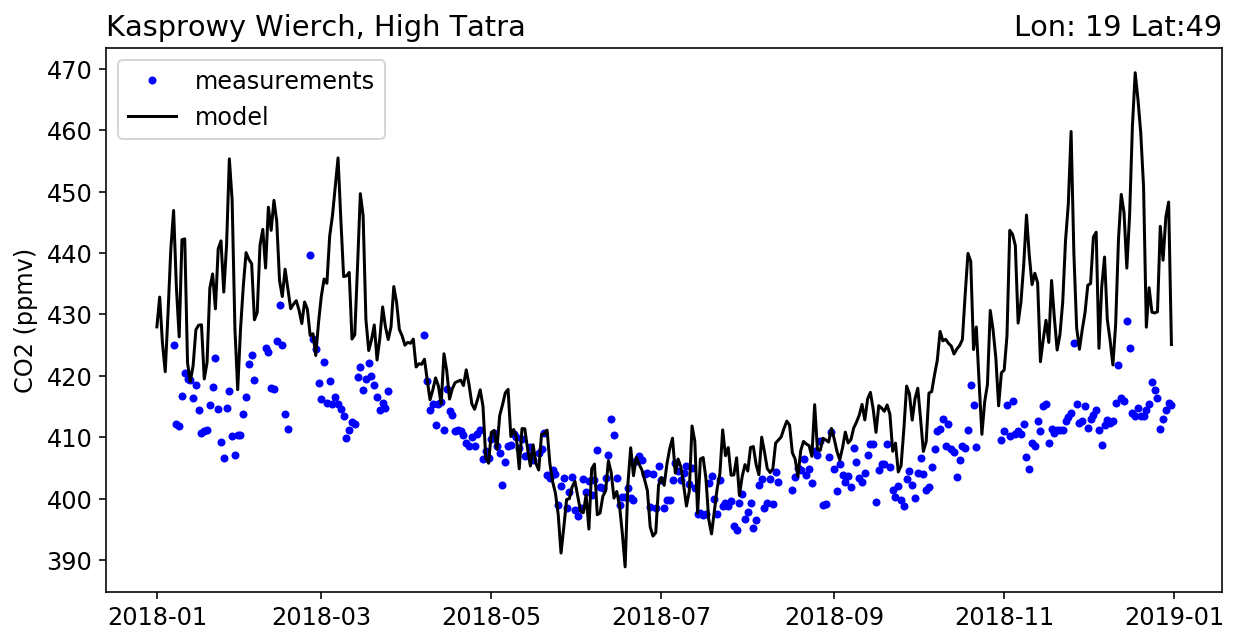

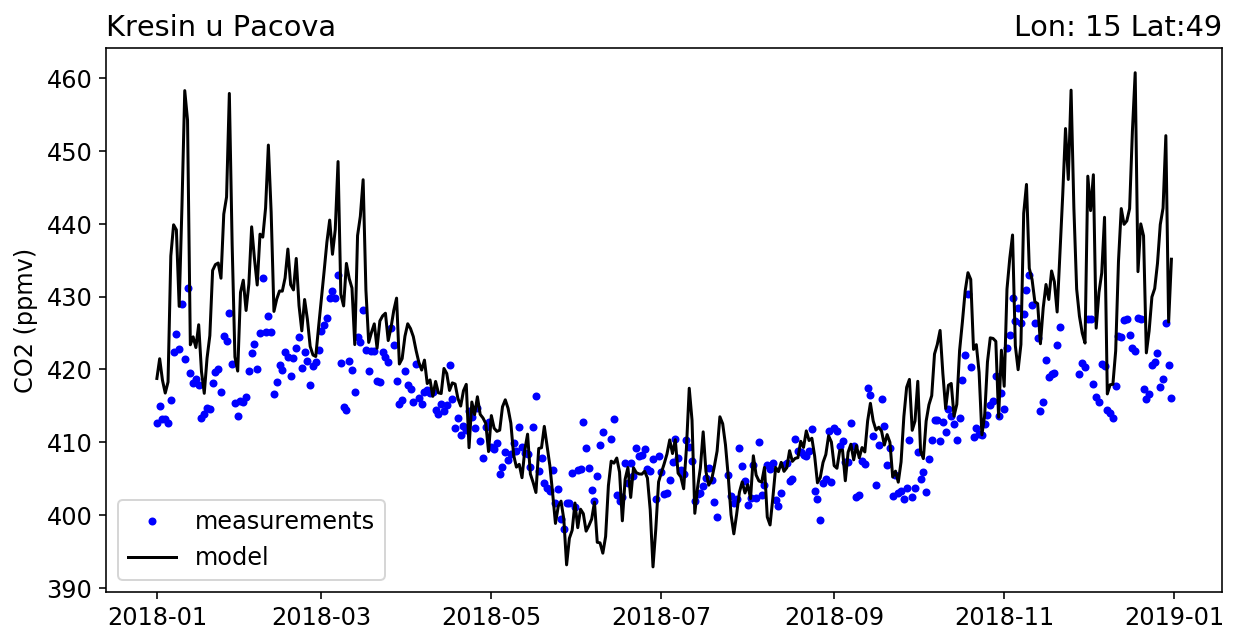

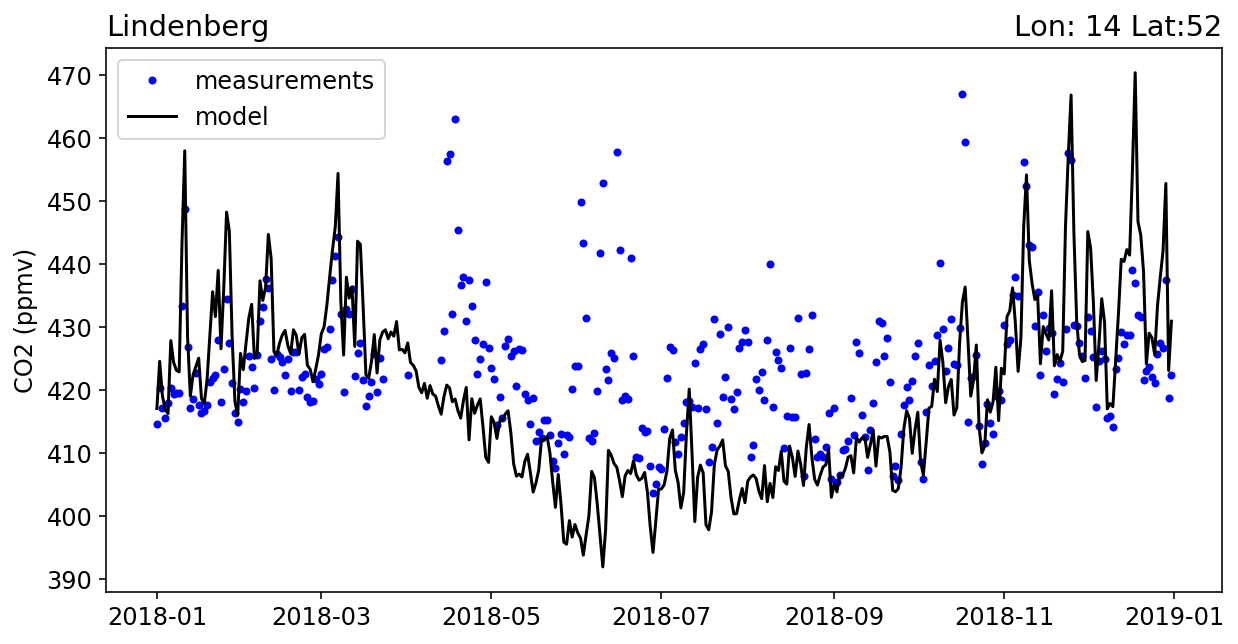

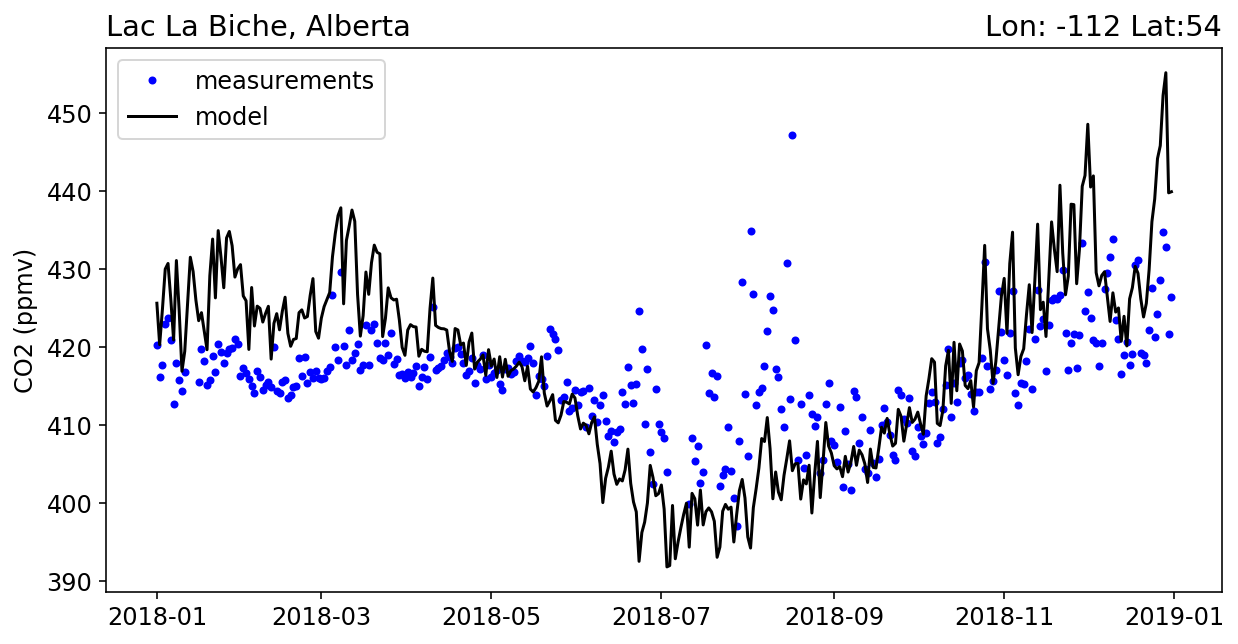

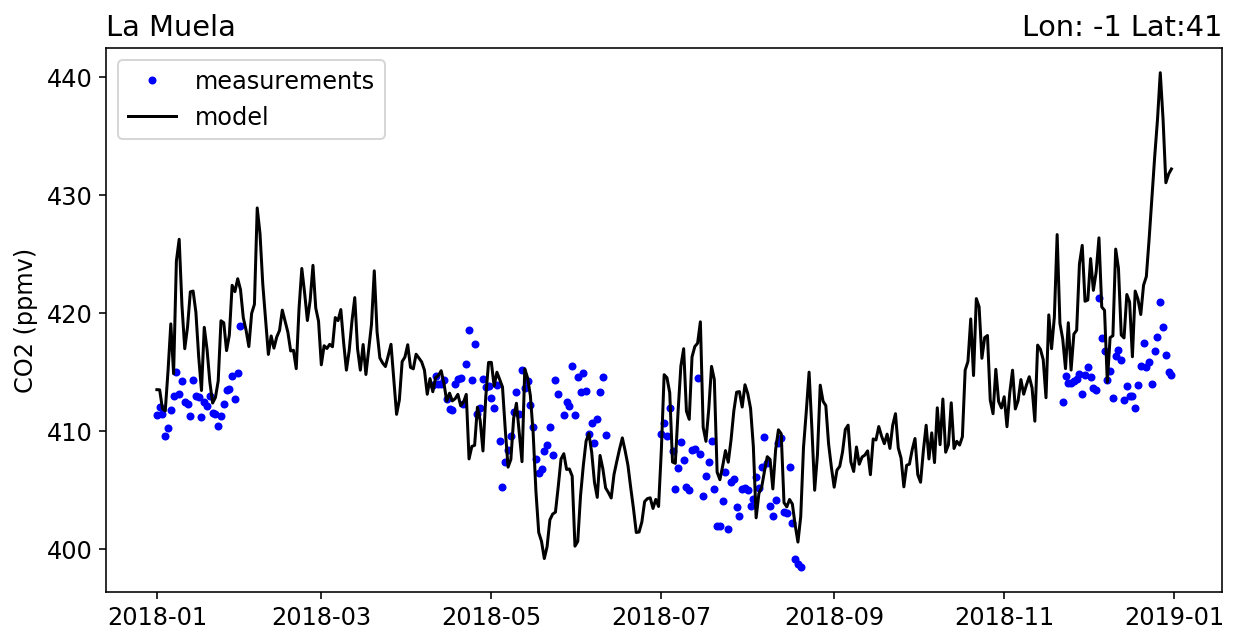

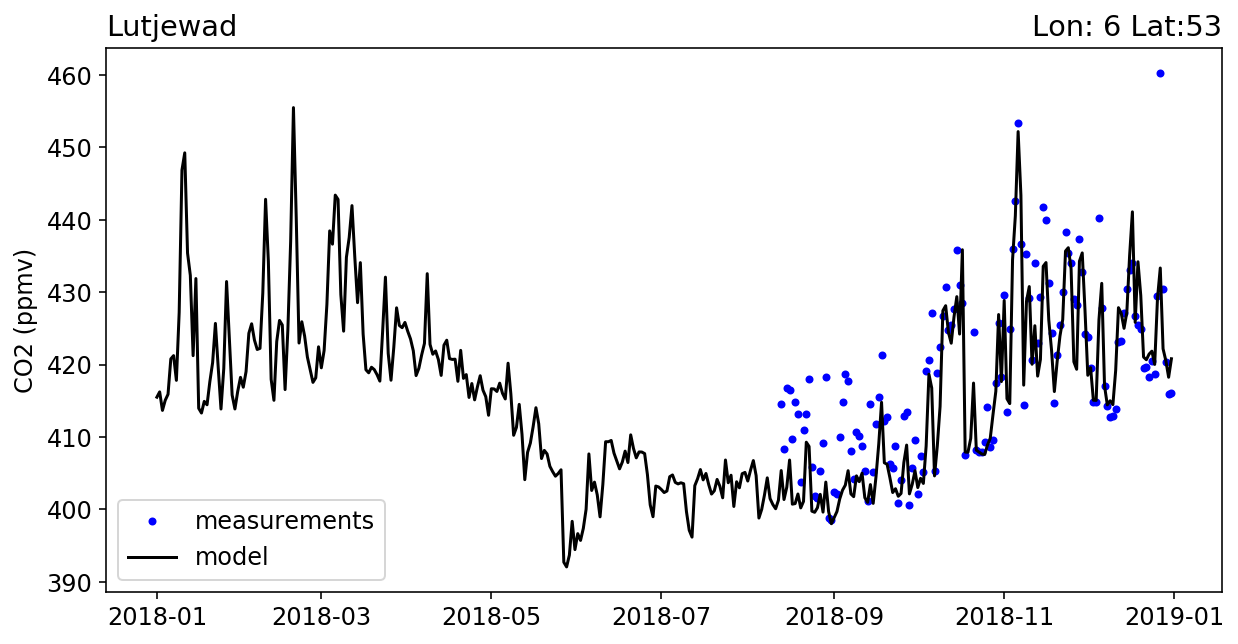

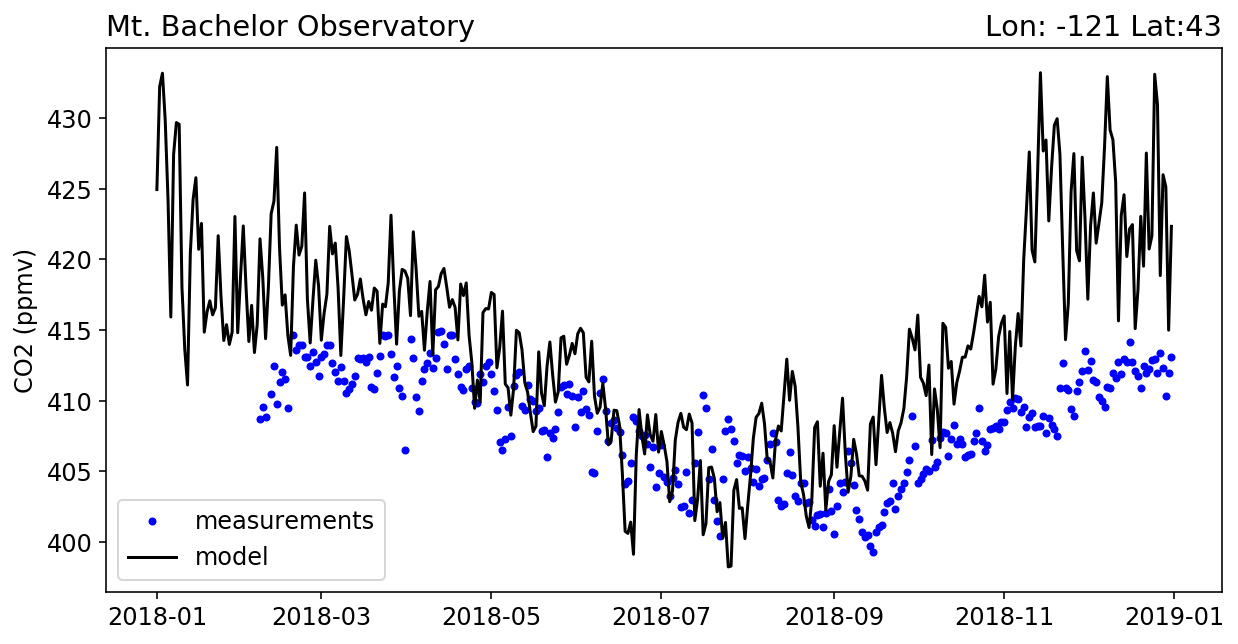

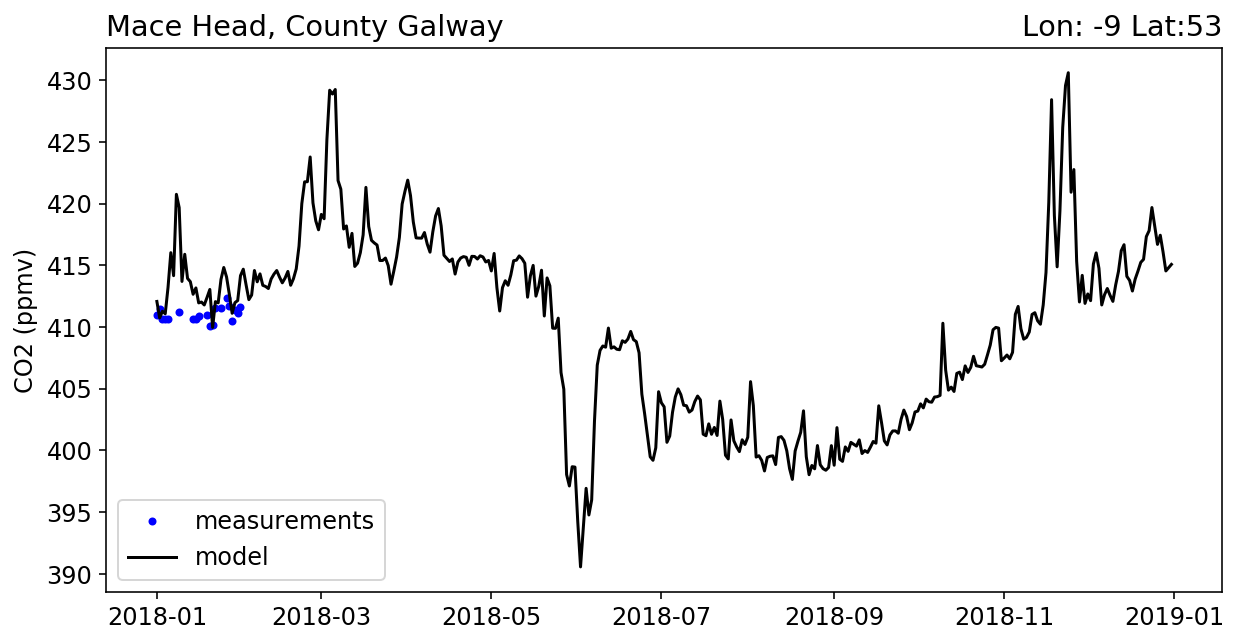

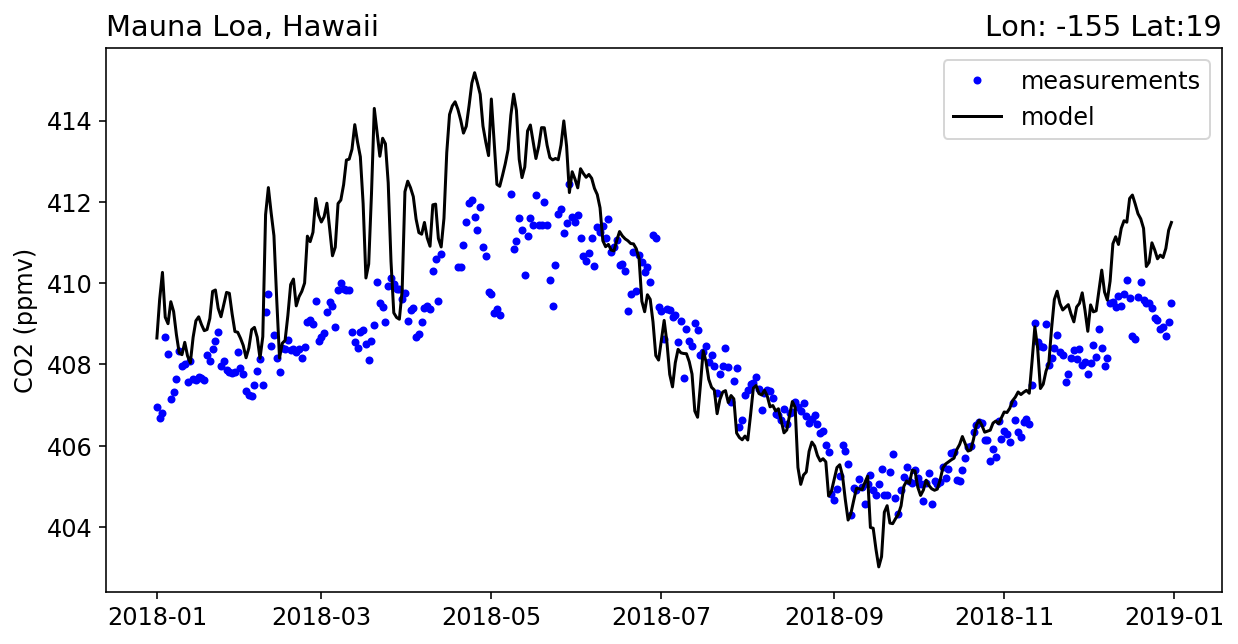

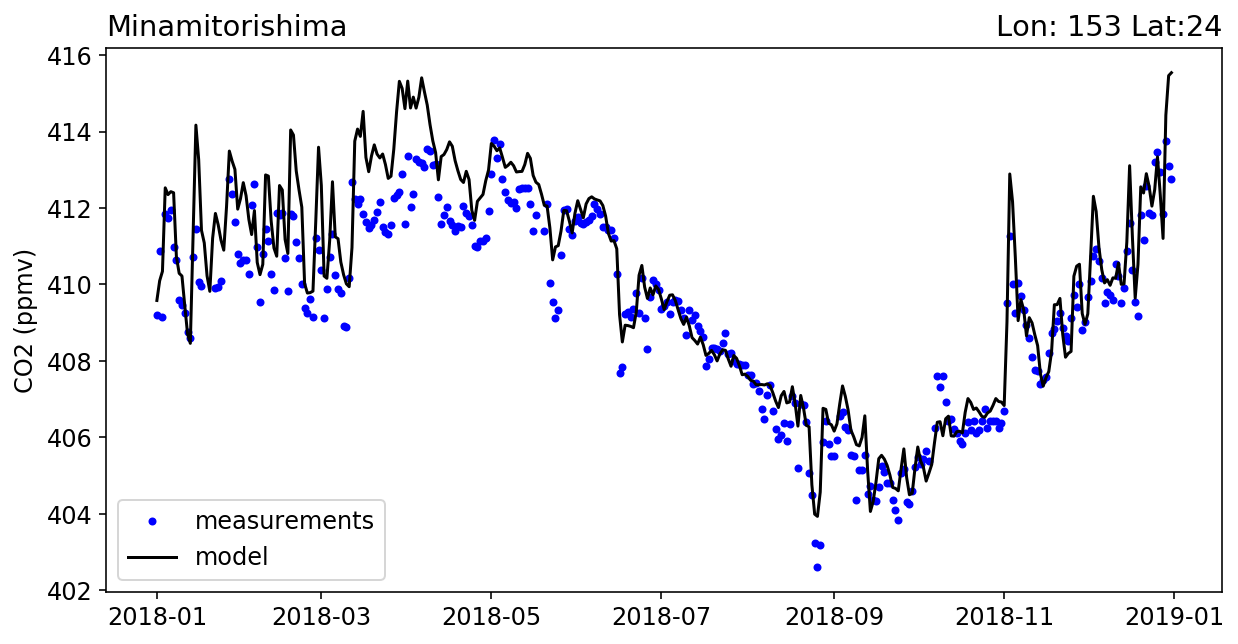

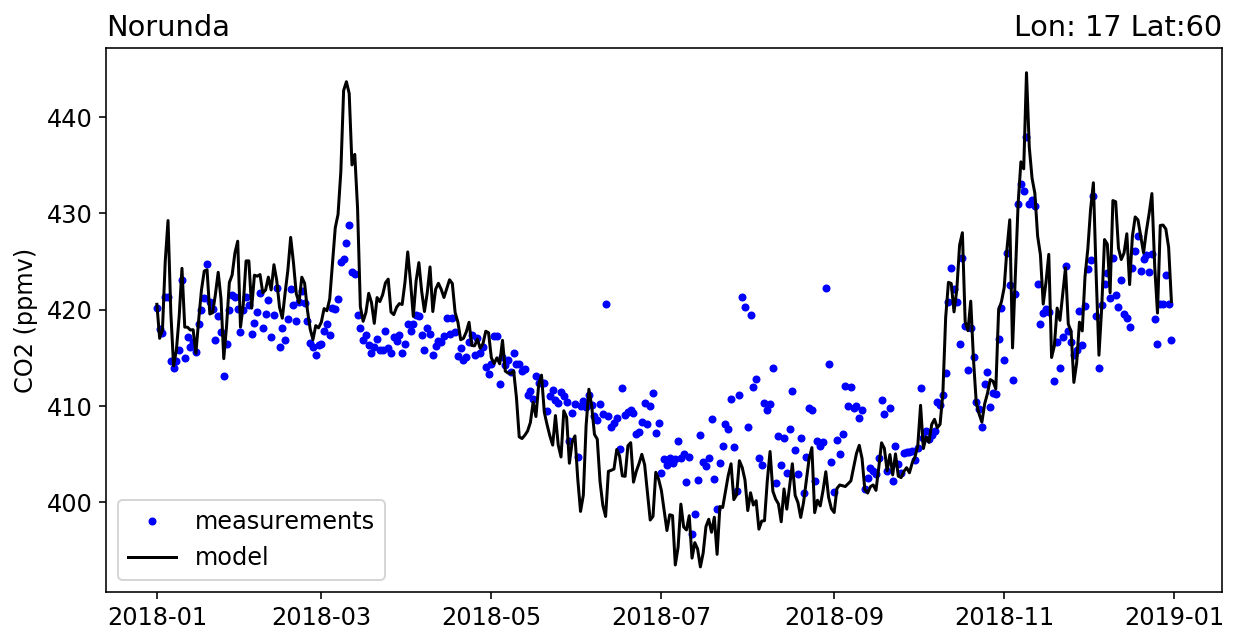

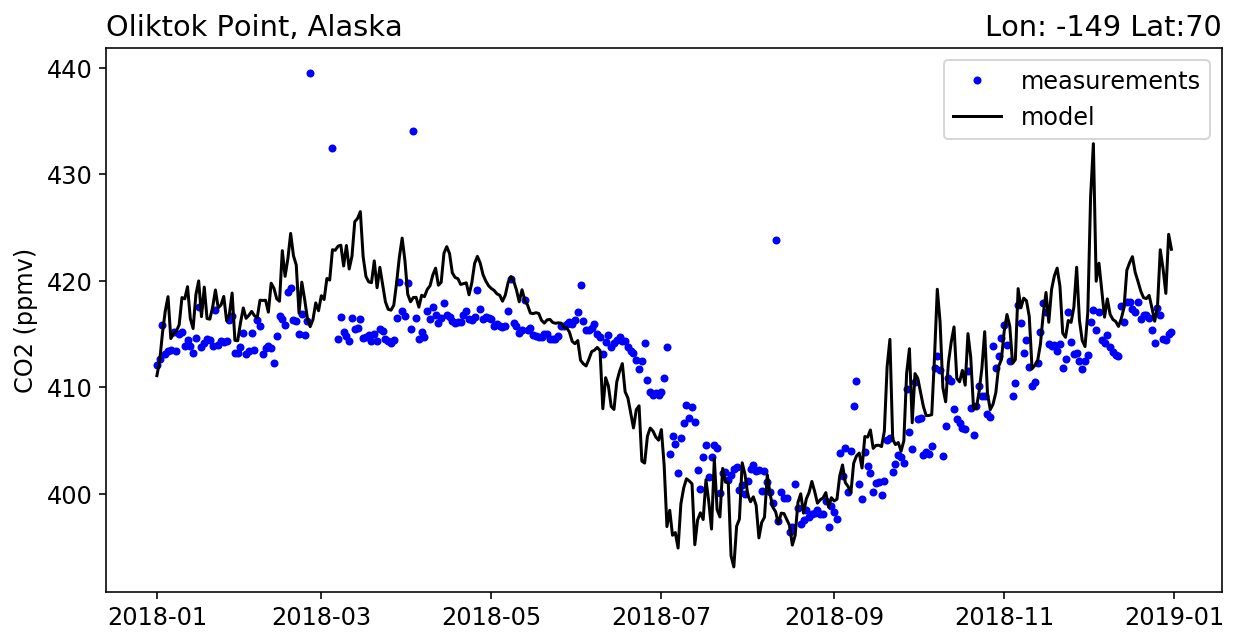

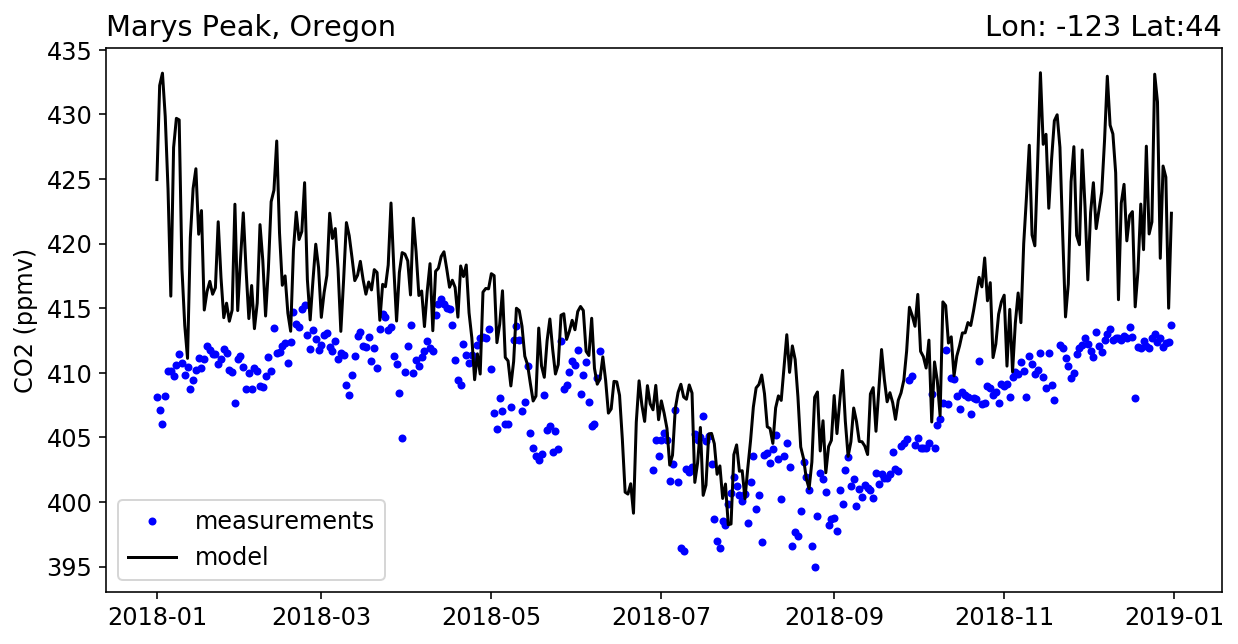

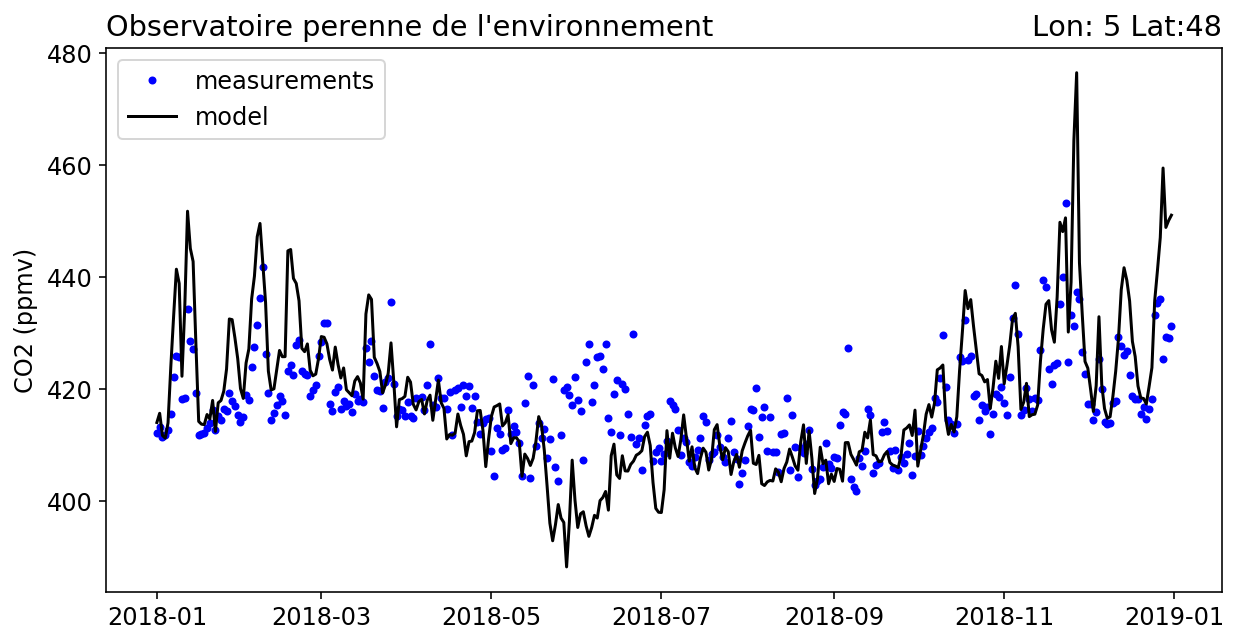

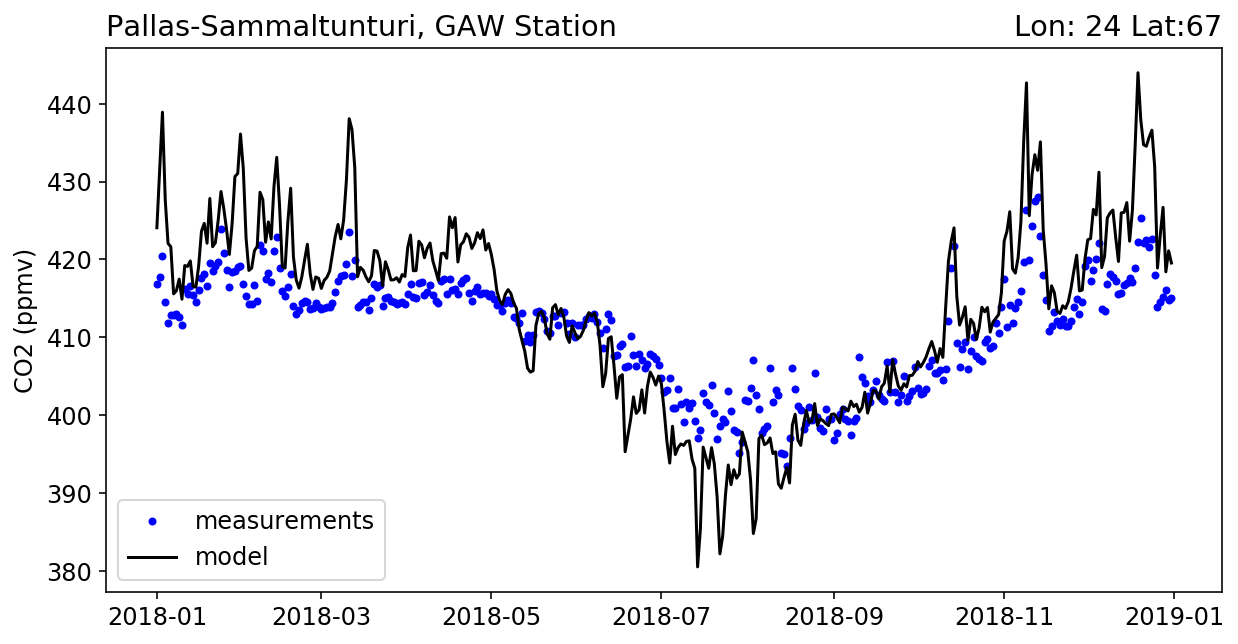

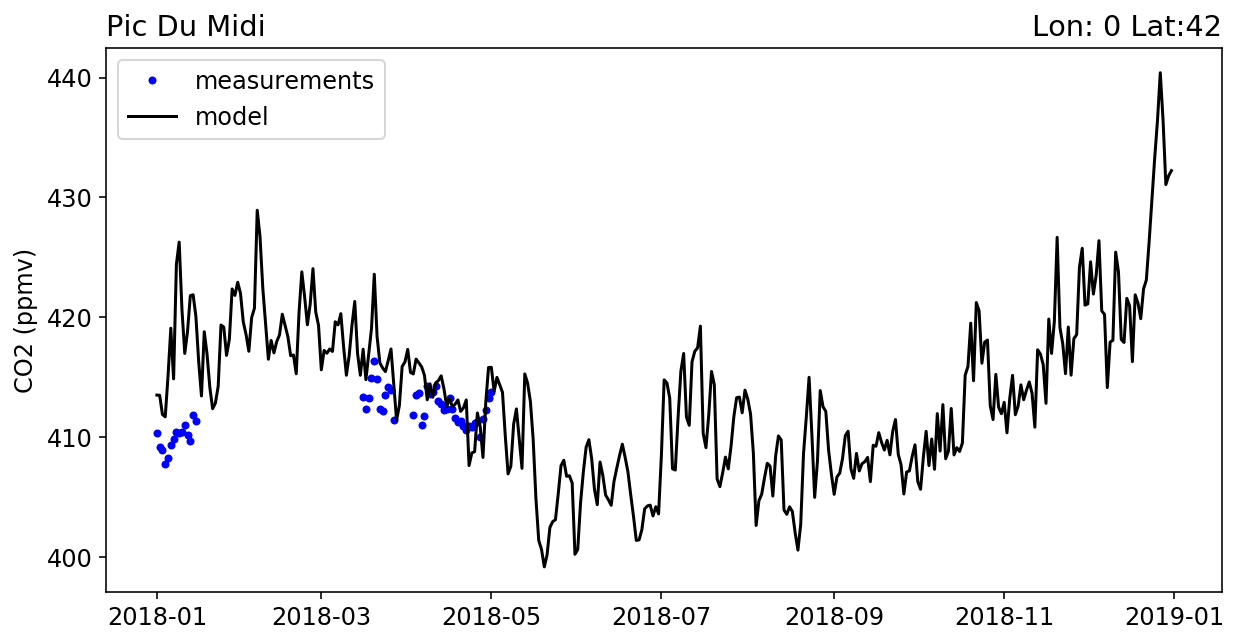

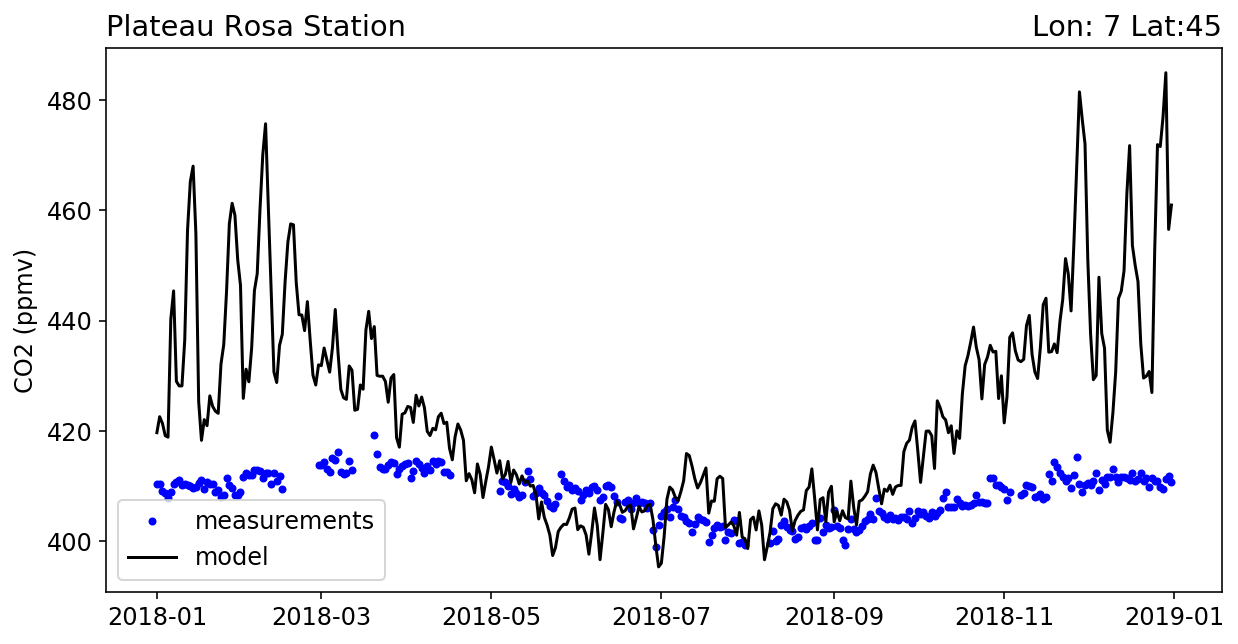

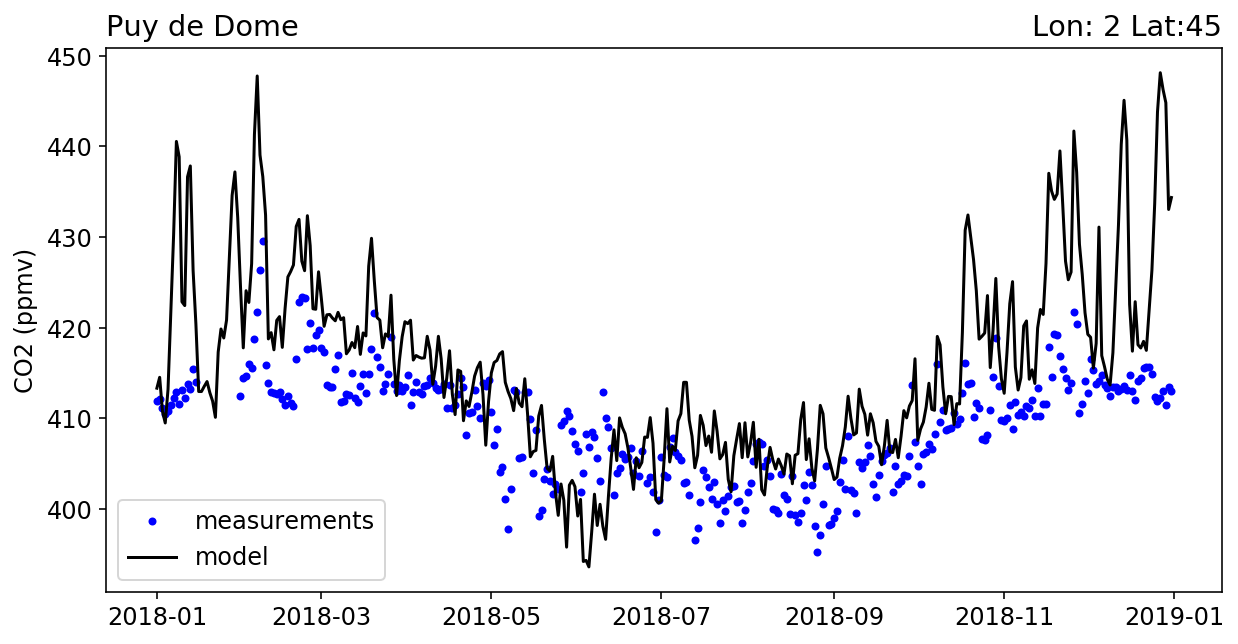

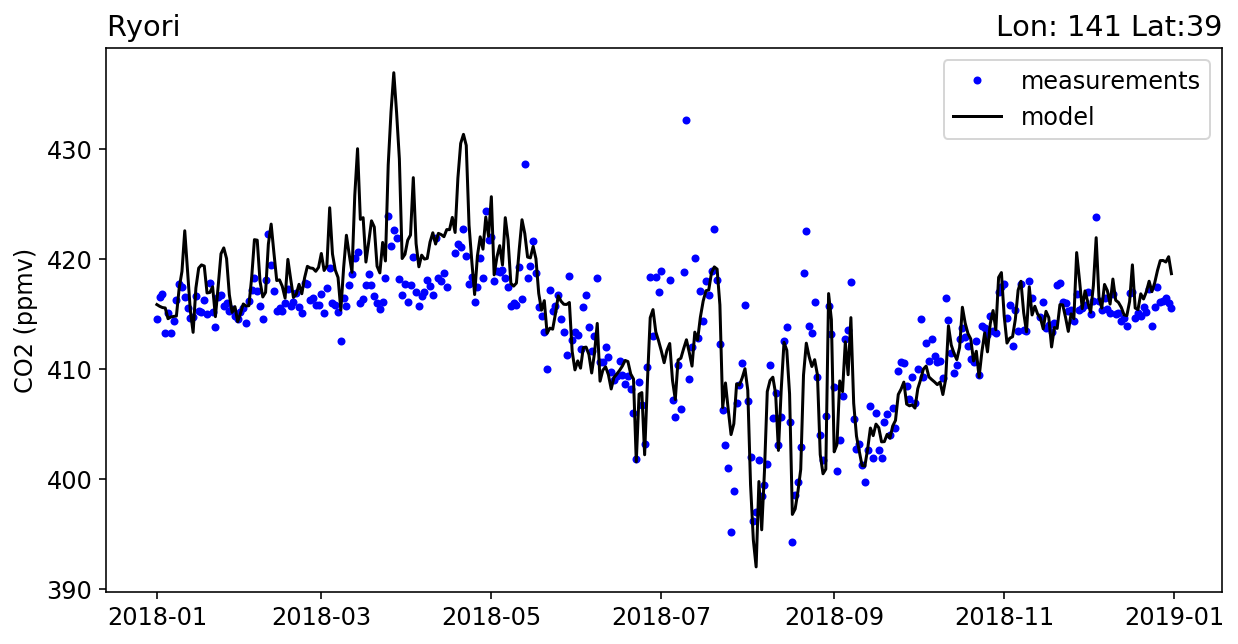

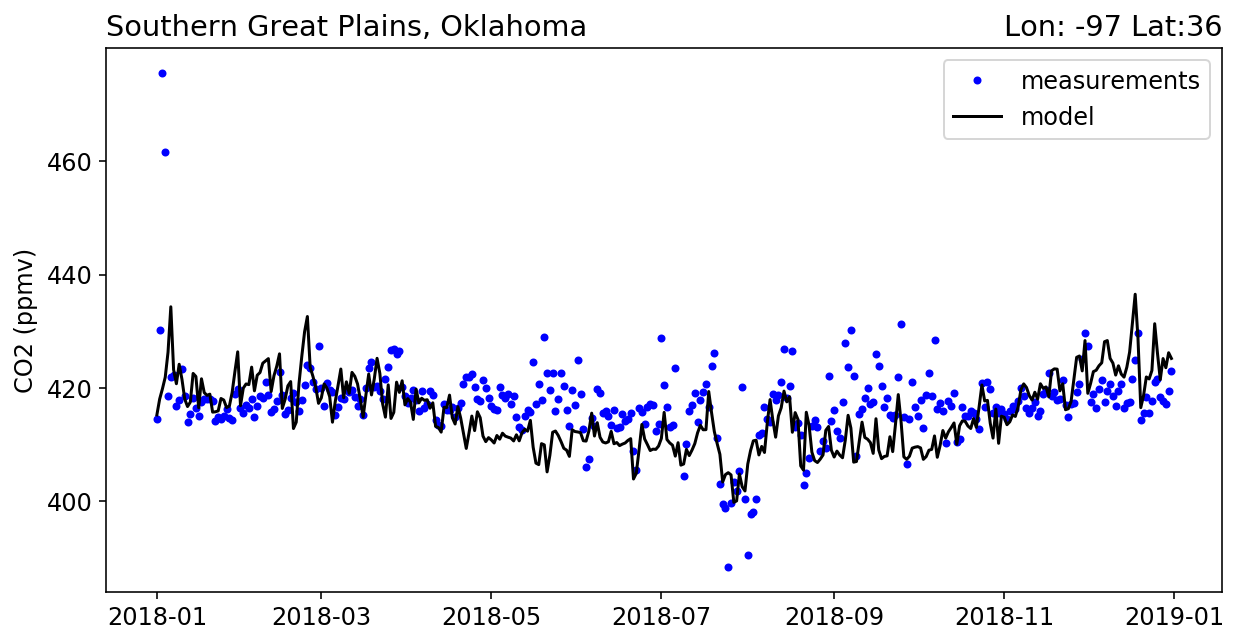

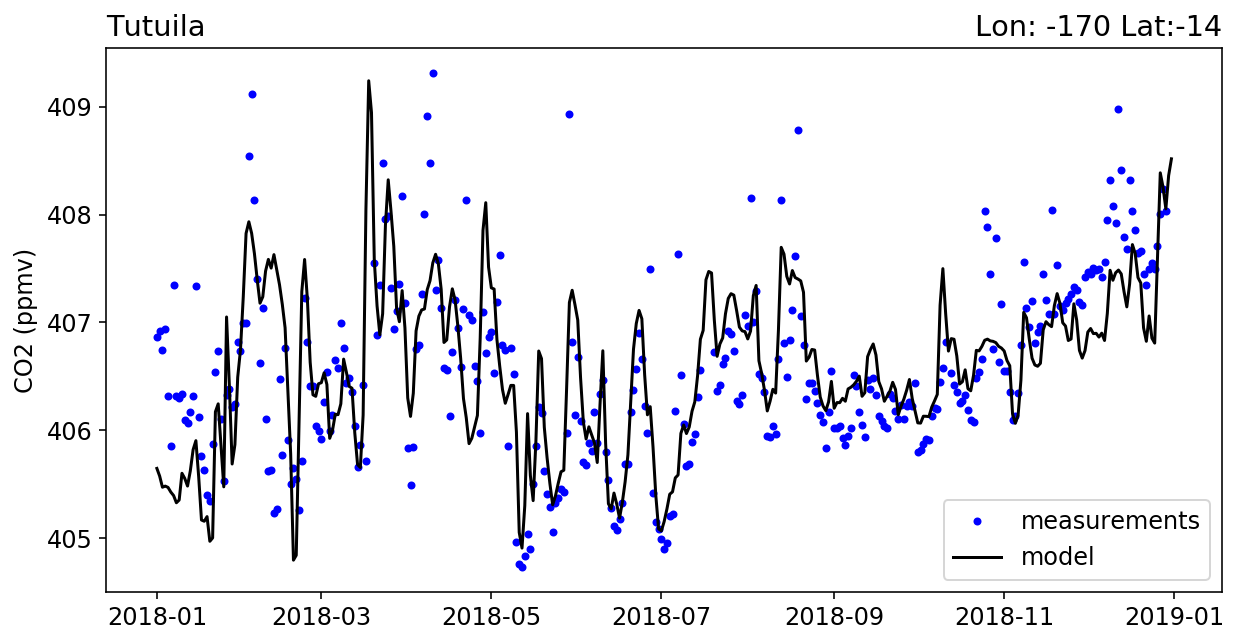

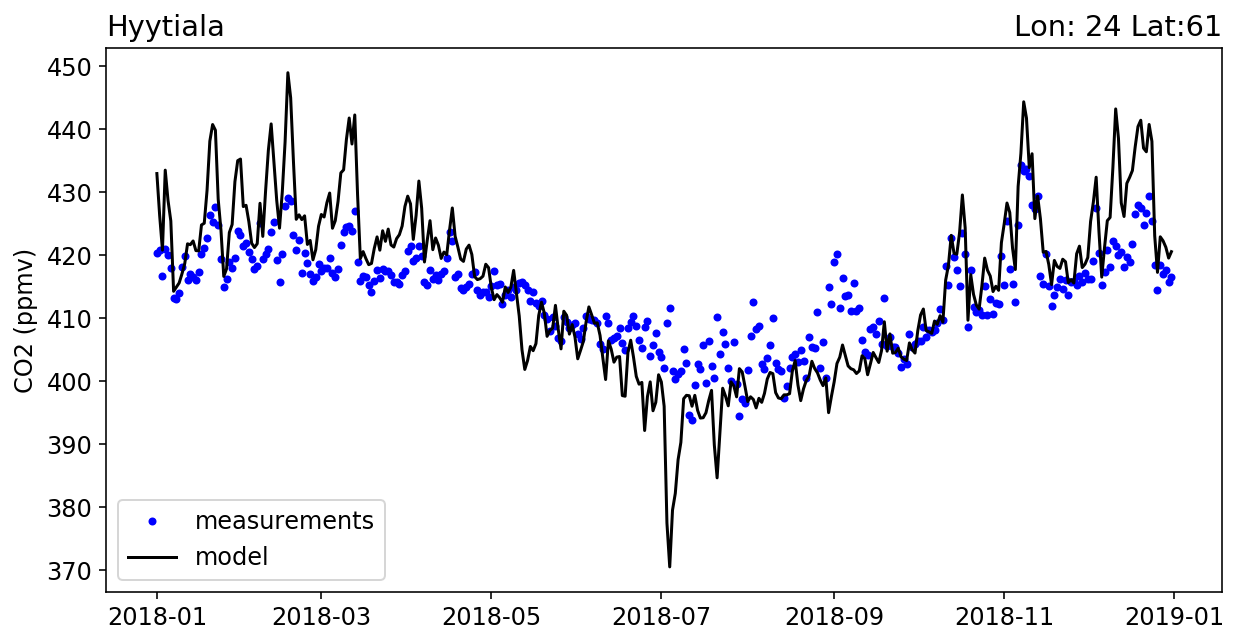

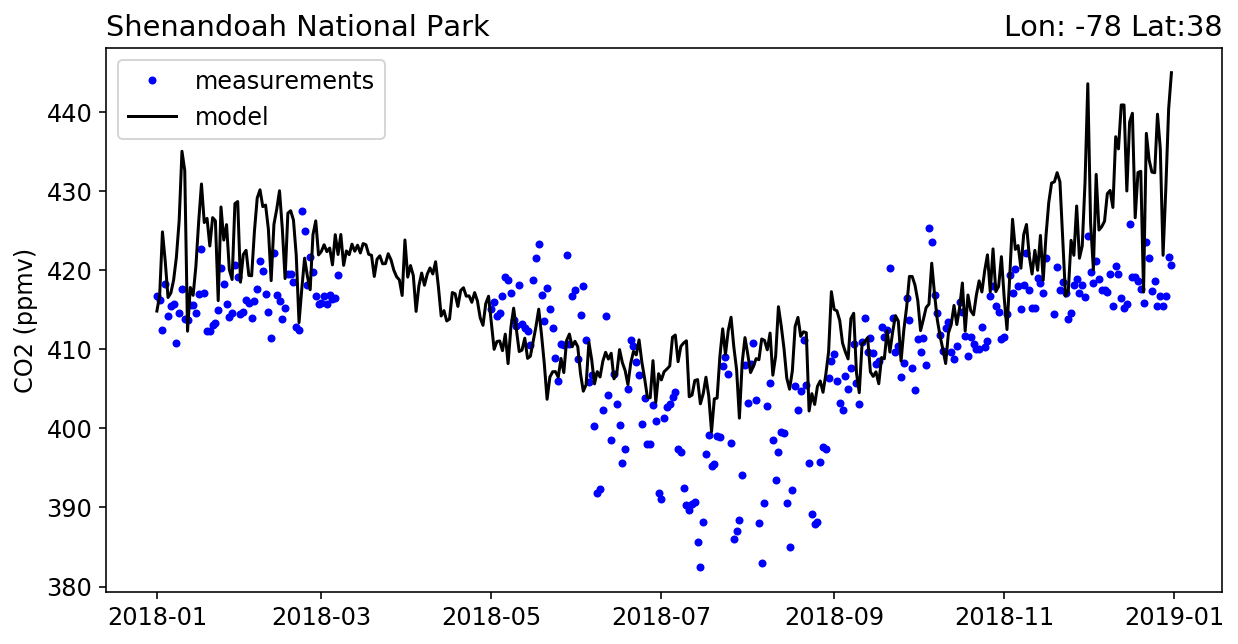

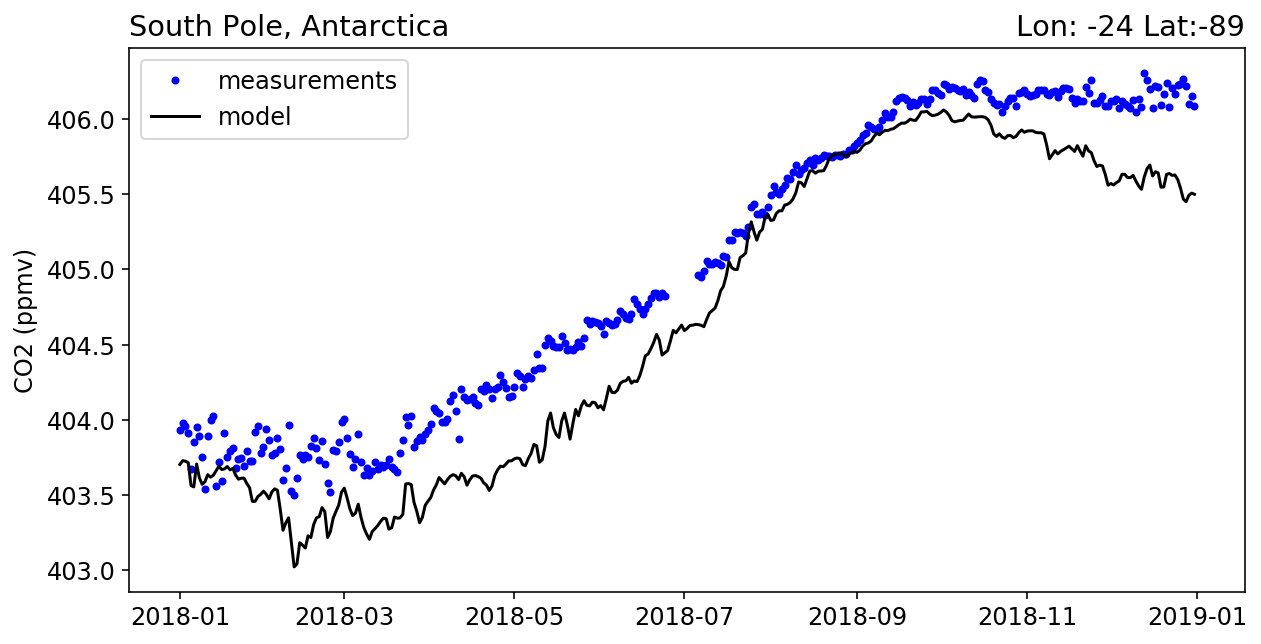

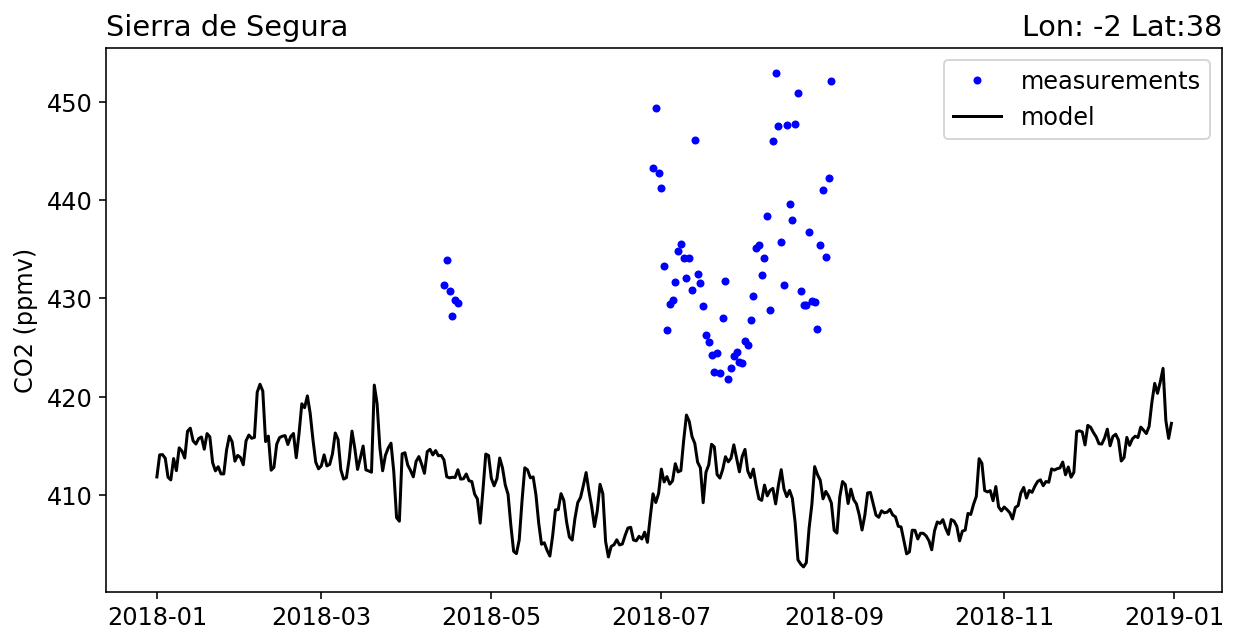

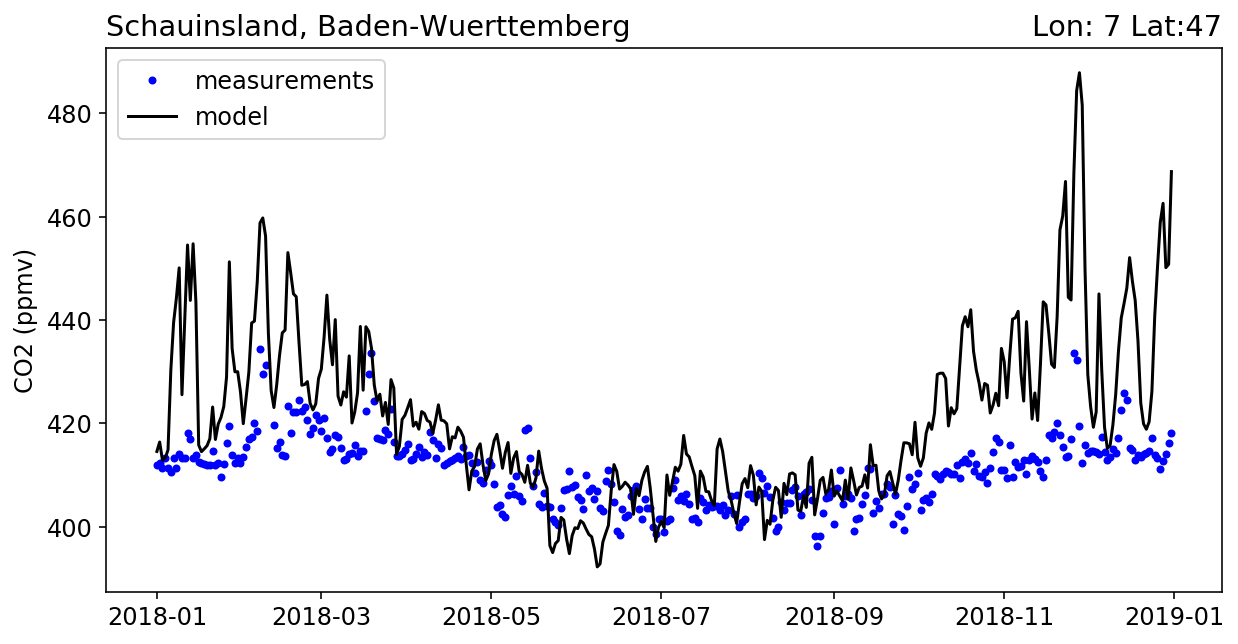

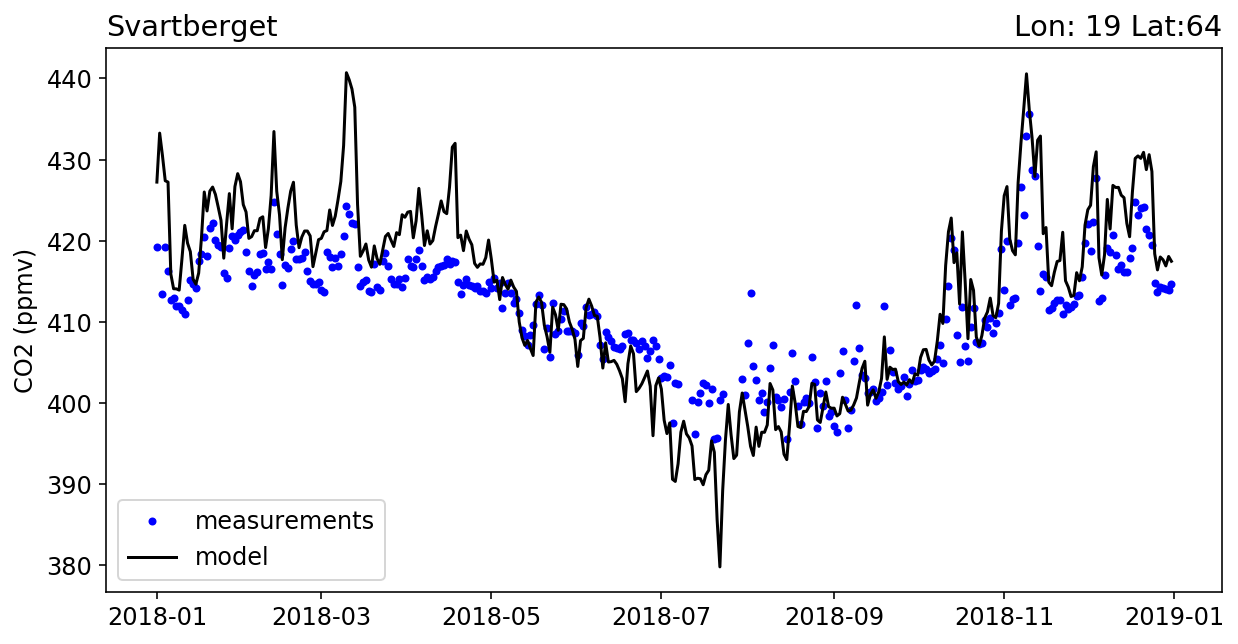

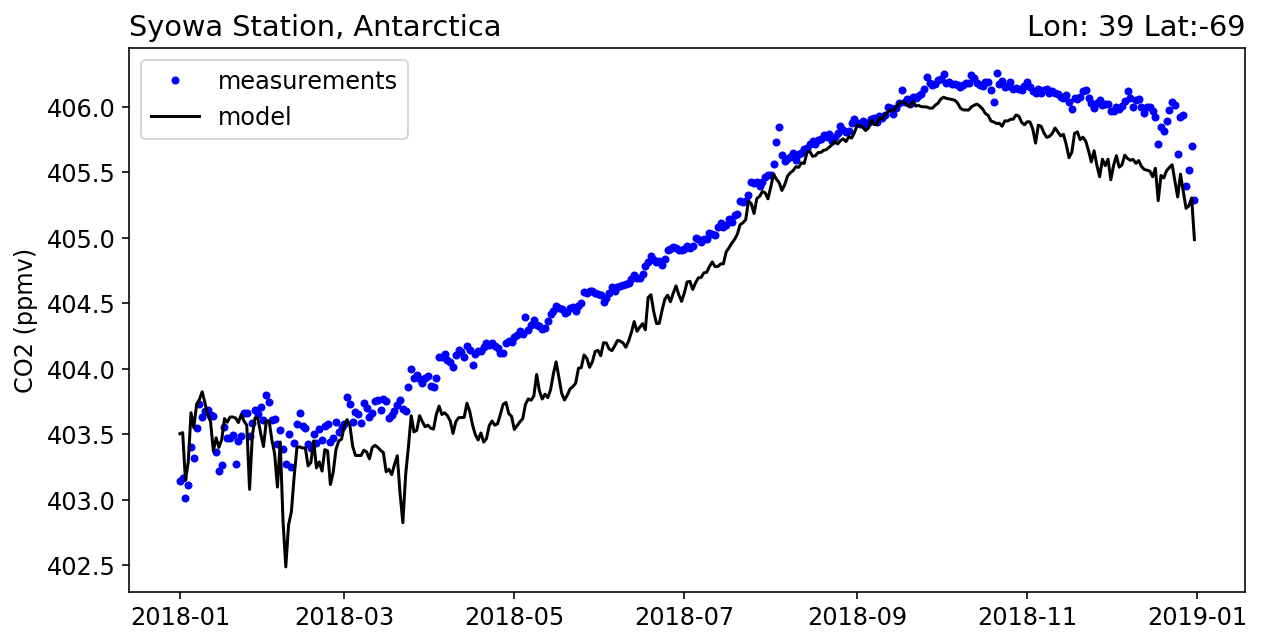

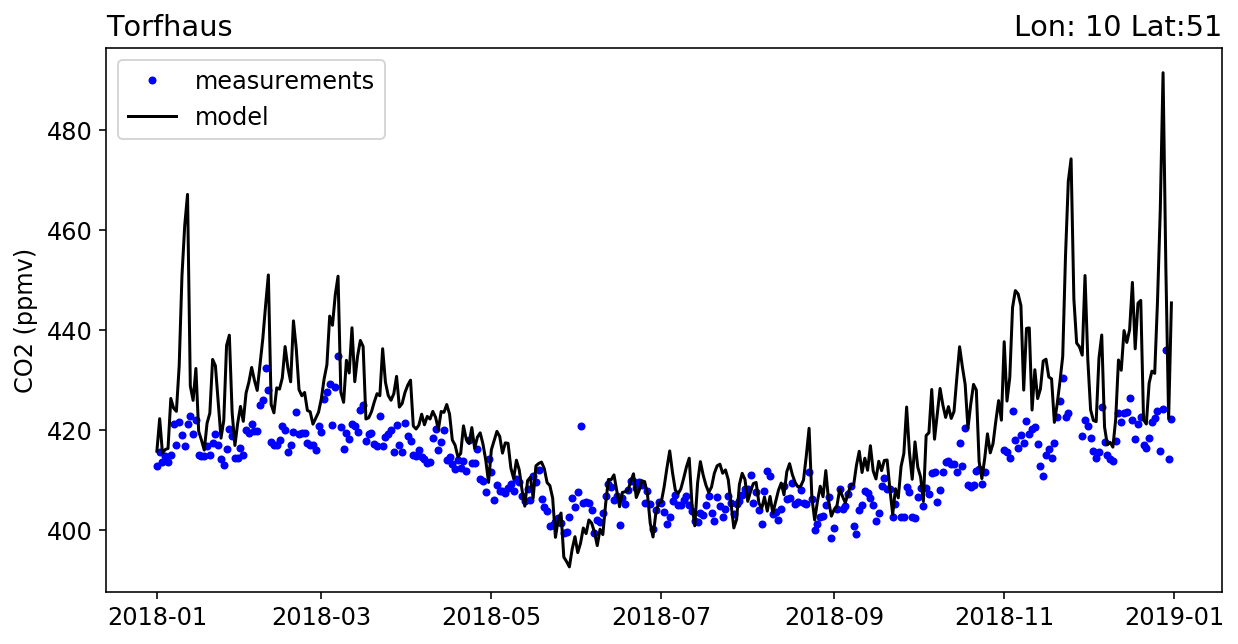

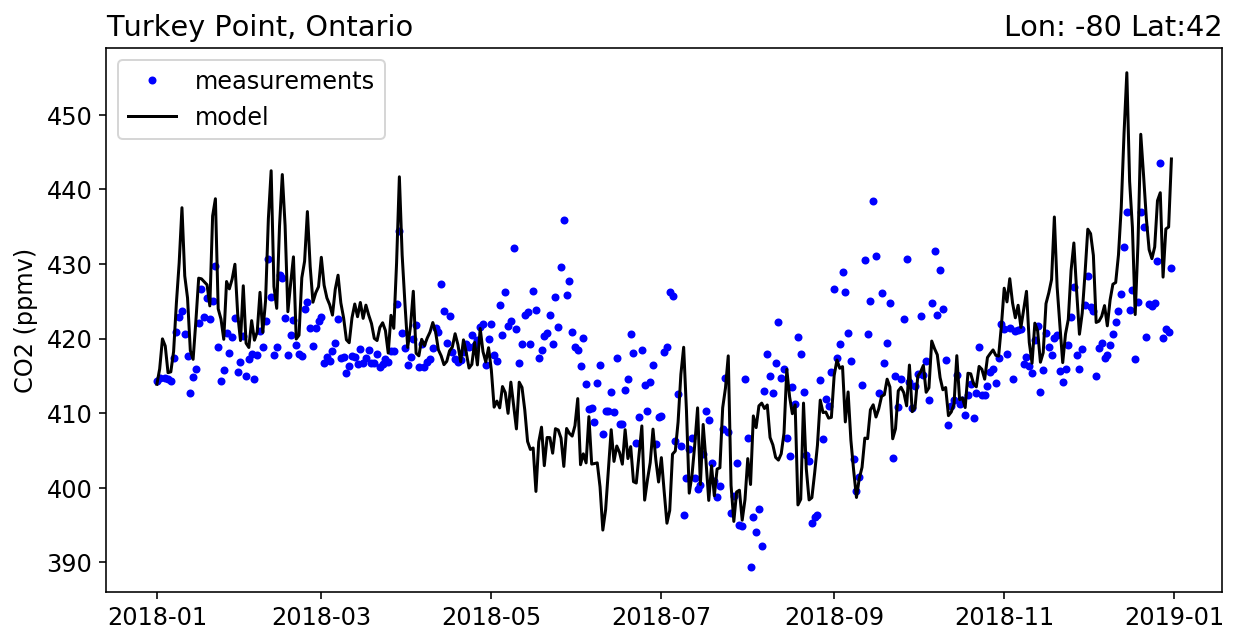

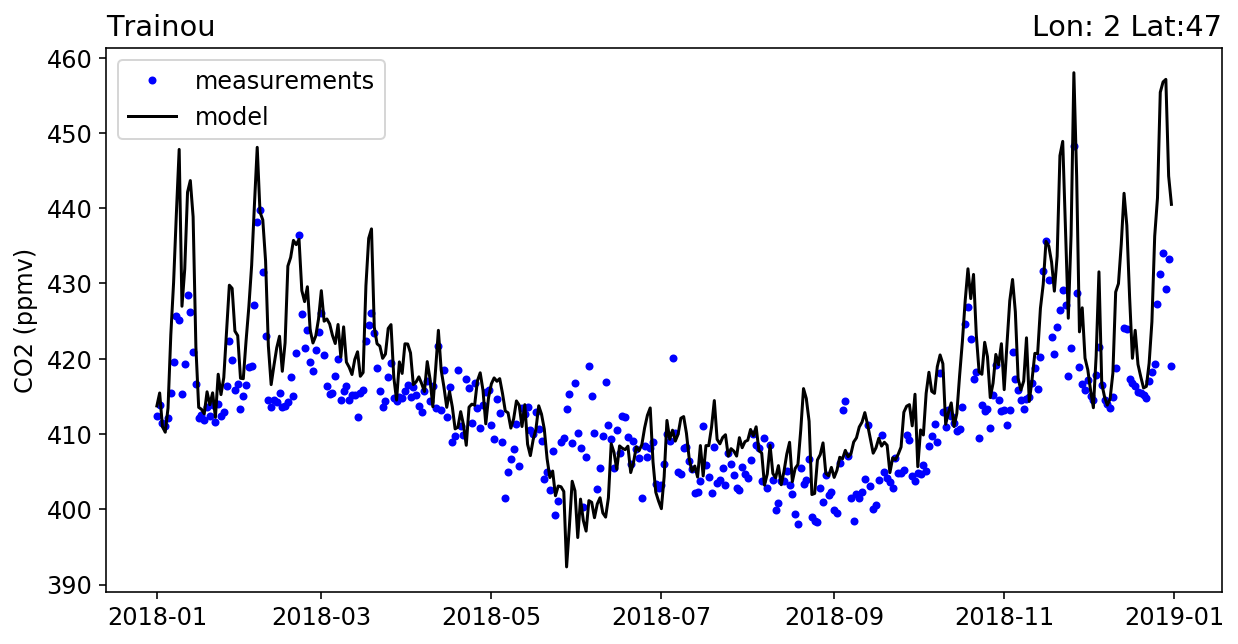

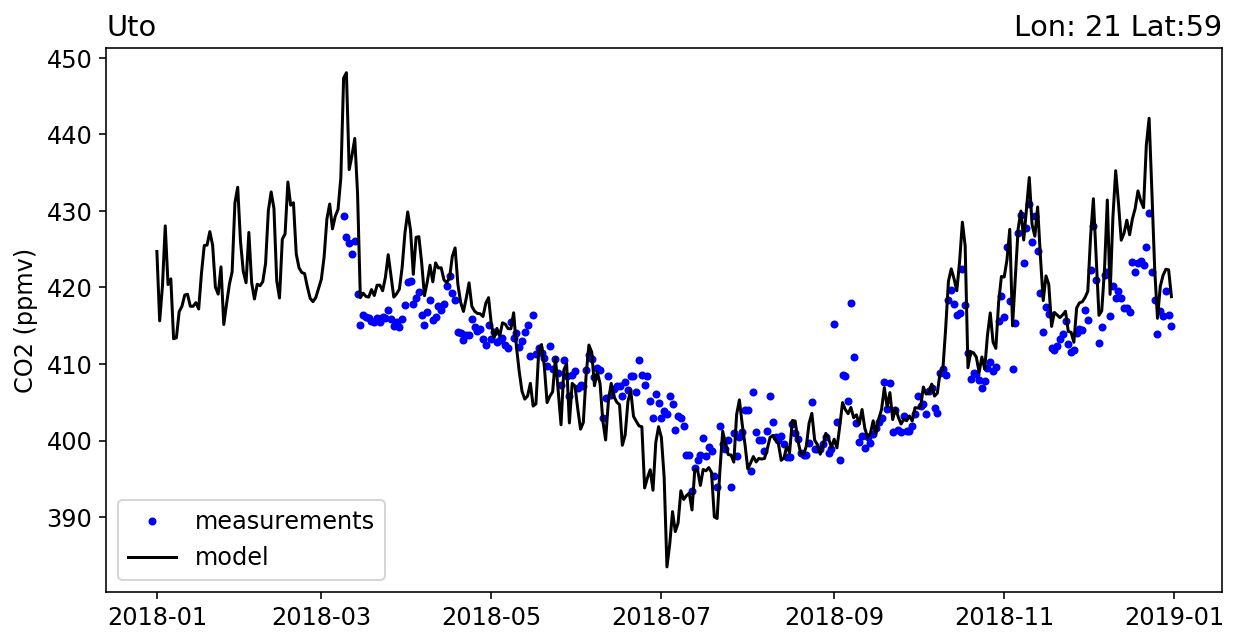

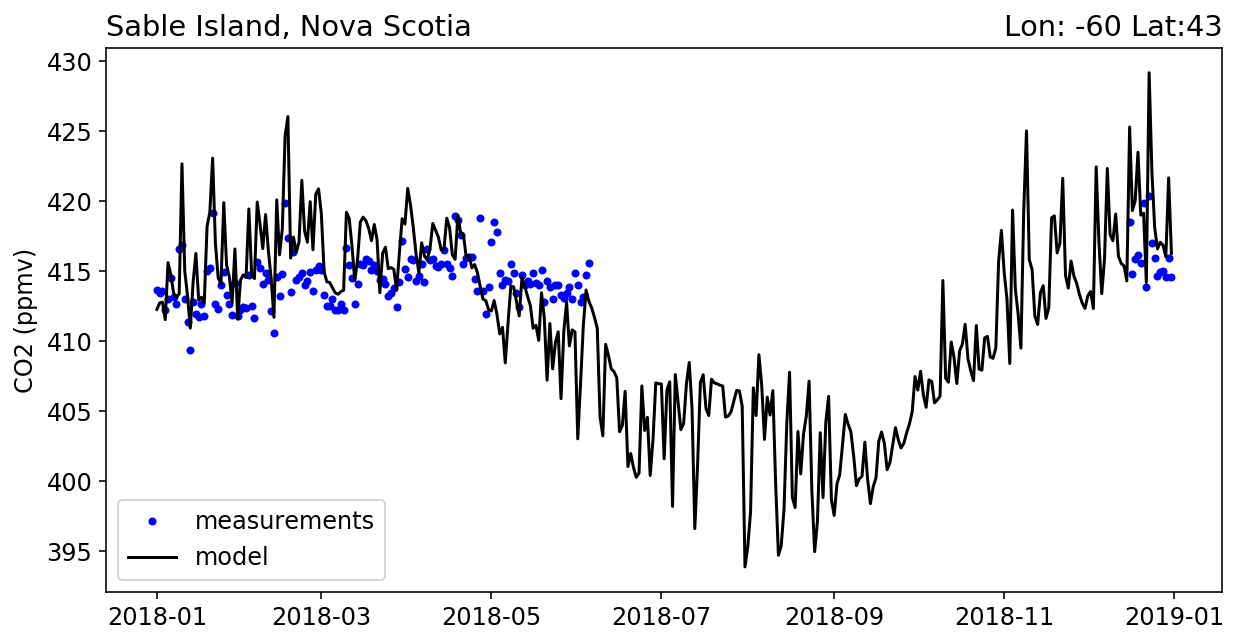

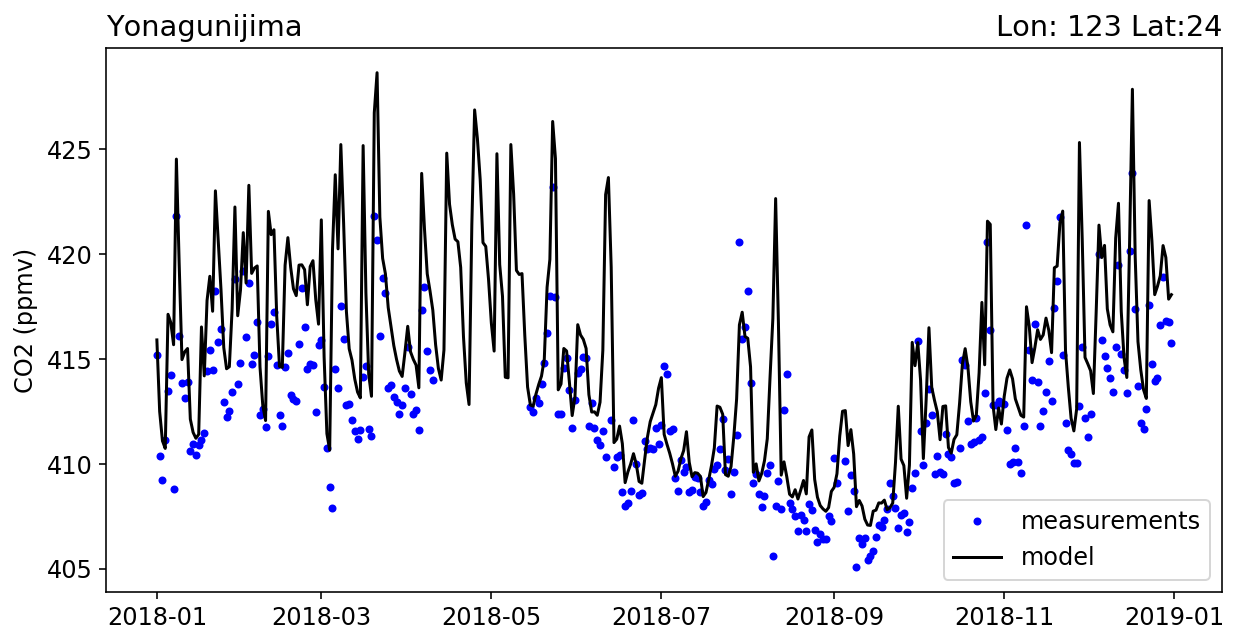

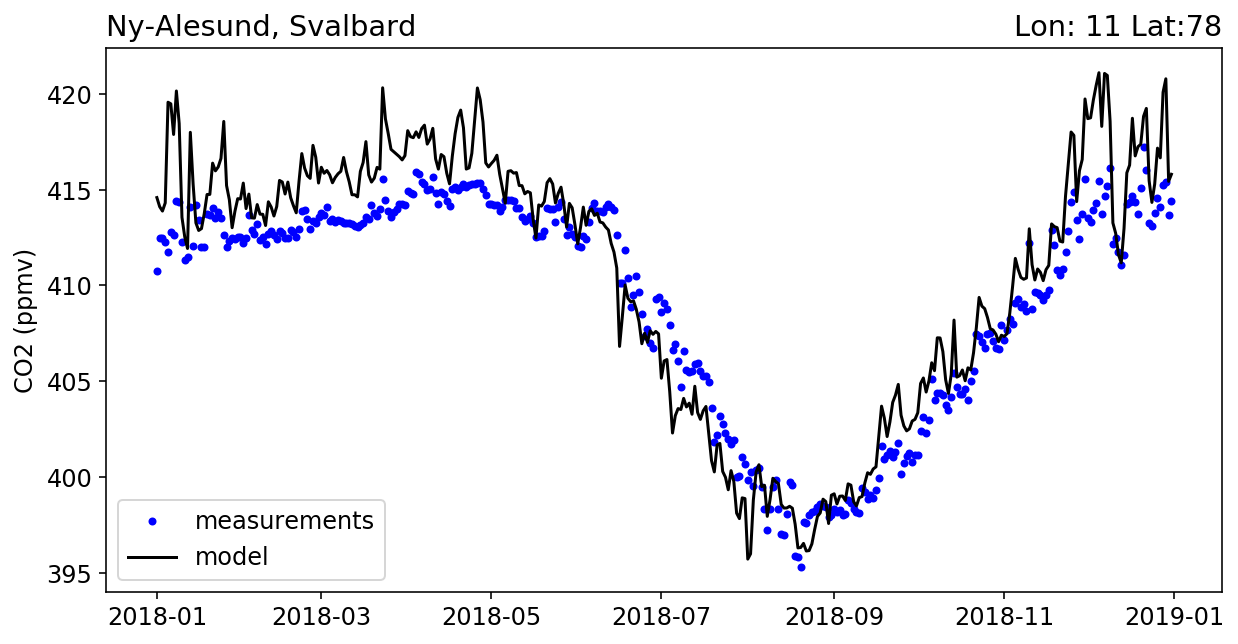

In [31]:
nm_loc = len(lines) # number of locations
for ifile in range(nm_loc):
    filename = lines[ifile].strip()
    ds_obs = xr.open_dataset(file_dir + filename)
    lon = ds_obs.attrs['site_longitude']
    lat = ds_obs.attrs['site_latitude']
    # extract the nearest grid point model output
    ts_model = daily_co2_mod.sel(lon = lon, lat = lat, method='nearest')*1e6
    
    ds_obs['obs'] = ds_obs['co2']
    ds_obs['mod'] = ds_obs['co2']
    ds_obs['mod'].values = ts_model.values
    
    obs_series = ds_obs['obs'].values
    model_series = ds_obs['mod'].values
    R = ma.corrcoef(ma.masked_invalid(obs_series), ma.masked_invalid(model_series))

    format_R = float("{0:.2f}".format(R[0,1]))
    print(format_R)

    fig = plt.figure(figsize=[10,5])
    plt.plot(ds_obs.date, ds_obs['obs'], 'b.', label = 'measurements')
    plt.plot(ds_obs.date, ds_obs['mod'], 'black', label = 'model')
    plt.legend()
    plt.title(ds_obs.attrs['site_name'], loc='left')
    plt.title('Lon: ' + str(int(lon)) + ' Lat:' + str(int(lat)), loc='right')
    plt.ylabel('CO2 (ppmv)')

    fig.savefig(file_dir + '/plots/' + str(year) + '_' + ds_obs.attrs['site_code'] + '_mod_vs_obs.png', dpi=300)
    